# Phân tích Thị trường Tuyển dụng Việt Nam
## Vietnam Job Market Analysis - IE313 Final Project

---

### Thông tin dự án

| Thông tin | Chi tiết |
|-----------|----------|
| Môn học | IE313 - Data Analysis |
| Chủ đề | Phân tích xu hướng thị trường việc làm Việt Nam |
| Thời điểm dữ liệu | Tháng 12/2025 (Snapshot) |
| Tổng số bản ghi | 85,470 tin tuyển dụng |
| Nguồn dữ liệu | Tổng hợp từ các trang tuyển dụng lớn |

---

### Nguồn dữ liệu

Dữ liệu được thu thập và tổng hợp từ các trang tuyển dụng hàng đầu tại Việt Nam:

| STT | Nguồn | Mô tả |
|-----|-------|-------|
| 1 | CareerViet.vn | Trang tuyển dụng truyền thống, đa ngành |
| 2 | TopCV.vn | Nền tảng CV và tuyển dụng, phổ biến với người trẻ |
| 3 | ViecLam24h.vn | Cổng thông tin việc làm toàn quốc |
| 4 | JobsGo.vn | Trang tìm việc nhanh, tập trung vào SME |

**Lưu ý:** Dataset không có cột `source` để truy vết nguồn gốc từng bản ghi, do đó không thể thống kê chính xác số tin từ mỗi nguồn.

### Phạm vi phân tích

Nghiên cứu này tập trung vào các khía cạnh sau:
- Phân bố nhu cầu tuyển dụng theo địa lý và cấp bậc
- Phân tích mức lương theo vùng miền, kinh nghiệm và vị trí
- Tổng hợp kỹ năng và ngành nghề phổ biến
- Xây dựng mô hình dự đoán lương và phân loại cấp bậc
- Phân cụm công việc để nhận diện phân khúc thị trường

### Giới hạn nghiên cứu

| Hạn chế | Ảnh hưởng | Mức độ |
|---------|-----------|--------|
| Dữ liệu lương parse từ text, chất lượng có thể không đồng đều | Sai số trong biến mục tiêu | Trung bình |
| Dữ liệu snapshot một thời điểm | Không phân tích được xu hướng theo thời gian | Cao |
| Thiếu cột source (không truy vết nguồn gốc) | Không so sánh được đặc điểm giữa các platform | Cao |
| Thiếu posted_date | Không xét được yếu tố lạm phát hoặc mùa vụ | Trung bình |

---

### Đường dẫn dữ liệu

```
Raw Data:   datasets/dataset_final.csv
Clean Data: data/clean/jobs_clean.csv
```

# Pipeline phân tích

Quy trình phân tích được thực hiện qua 6 giai đoạn:

1. **Thu thập dữ liệu** - Tổng hợp dữ liệu từ các trang tuyển dụng, tổng cộng 85,470 tin
2. **Làm sạch** - Xử lý missing values, loại outliers, flag trùng lặp, chuẩn hoá đơn vị tiền tệ (USD sang VND)
3. **Feature Engineering** - Tạo biến region, exp_years, position_simple từ dữ liệu thô
4. **Exploratory Data Analysis** - 12+ biểu đồ phân tích phân bố, tương quan
5. **Modeling** - 3 loại bài toán: Regression (lương), Classification (cấp bậc), Clustering (nhóm việc)
6. **Output** - So sánh mô hình, rút insights và khuyến nghị

# Đặt vấn đề & Câu hỏi nghiên cứu

## Bối cảnh
Thị trường việc làm Việt Nam đang trong giai đoạn chuyển đổi số mạnh mẽ. Việc phân tích dữ liệu tuyển dụng giúp:
- **Người tìm việc**: Hiểu rõ xu hướng, kỹ năng cần thiết, mức lương thị trường
- **Doanh nghiệp**: Định vị mức lương cạnh tranh, tối ưu JD
- **Cơ sở đào tạo**: Điều chỉnh chương trình phù hợp nhu cầu thực tế

## Câu hỏi nghiên cứu (Research Questions)

| RQ | Câu hỏi | Phương pháp |
|----|---------|-------------|
| RQ1 | Ngành/lĩnh vực nào có nhu cầu tuyển dụng cao nhất? | EDA - Bar chart |
| RQ2 | Kỹ năng nào được yêu cầu phổ biến nhất? | Text mining, Frequency |
| RQ3 | Mức lương khác nhau như thế nào theo vùng miền? | Box plot, ANOVA |
| RQ4 | Mức lương khác nhau như thế nào theo cấp bậc? | Regression analysis |
| RQ5 | Kinh nghiệm ảnh hưởng thế nào đến lương? | Correlation, Trend |
| RQ6 | Có thể phân cụm các công việc theo đặc điểm? | K-Means Clustering |
| RQ7 | Yếu tố nào quan trọng nhất trong dự đoán lương? | Feature Importance |
| RQ8 | Có thể dự đoán cấp bậc từ thông tin công việc? | Classification |
| RQ9 | Phân bố địa lý của việc làm như thế nào? | Geographic EDA |
| RQ10 | Kỹ năng nào gắn với mức lương cao? | Group comparison |

## Giả thuyết nghiên cứu (Hypotheses)

| ID | Giả thuyết | Kiểm chứng |
|----|------------|------------|
| H1 | Lương tại Miền Nam cao hơn Miền Bắc | t-test, median comparison |
| H2 | Kinh nghiệm càng cao, lương càng cao | Correlation, Regression |
| H3 | Cấp Giám đốc có lương cao nhất | ANOVA, Box plot |
| H4 | Kỹ năng IT (Python, SQL) có lương cao hơn | Group comparison |
| H5 | Ngành Ngân hàng/Tài chính có lương cao | Industry analysis |
| H6 | Công việc tập trung chủ yếu ở HCM và Hà Nội | Geographic distribution |

# Sơ đồ Quy trình Nghiên cứu (Research Pipeline)

```mermaid
flowchart LR
    subgraph INPUT["Thu thập"]
        A1[CareerViet.vn] --> B[Raw Data<br/>85,470 records]
        A2[TopCV.vn] --> B
        A3[ViecLam24h.vn] --> B
        A4[JobsGo.vn] --> B
    end
    
    subgraph CLEAN["Xử lý"]
        B --> C[Làm sạch<br/>- Xử lý missing<br/>- Loại outlier<br/>- Chuẩn hoá currency]
        C --> D[Feature Engineering<br/>- Region mapping<br/>- Experience parsing<br/>- Position simplification]
    end
    
    subgraph EDA["Khám phá"]
        D --> E[EDA & Visualization<br/>12+ biểu đồ]
        E --> F[Thống kê mô tả<br/>Correlation analysis]
    end
    
    subgraph MODEL["Mô hình"]
        F --> G[Regression<br/>Ridge, RF, GB]
        F --> H[Classification<br/>Logistic Regression]
        F --> I[Clustering<br/>K-Means]
    end
    
    subgraph OUTPUT["Kết quả"]
        G --> J[Model Comparison]
        H --> J
        I --> J
        J --> K[Insights &<br/>Recommendations]
    end
    
    style INPUT fill:#e3f2fd
    style CLEAN fill:#fff3e0
    style EDA fill:#e8f5e9
    style MODEL fill:#fce4ec
    style OUTPUT fill:#f3e5f5
```

**Giải thích Pipeline:**
1. **Thu thập**: Tổng hợp dữ liệu từ các trang tuyển dụng (85,470 tin)
2. **Làm sạch**: Xử lý missing values, outliers, flag trùng lặp, chuẩn hoá đơn vị tiền tệ (USD→VND)
3. **Feature Engineering**: Tạo biến region, exp_years, position_simple từ dữ liệu thô
4. **EDA**: 12+ biểu đồ phân tích phân bố, tương quan, xu hướng
5. **Modeling**: 3 loại bài toán - Regression (lương), Classification (cấp bậc), Clustering (nhóm công việc)
6. **Output**: So sánh mô hình, rút ra insights và khuyến nghị cho 3 nhóm đối tượng

# Sơ đồ Mô hình Khái niệm

## Cấu trúc Features và Targets

| Nhóm Features | Biến | Mô tả |
|---------------|------|-------|
| **Location** | city, region | Địa điểm làm việc |
| **Job Info** | job_title, job_type, job_fields | Thông tin vị trí tuyển dụng |
| **Requirements** | experience, exp_years, skills | Yêu cầu ứng viên |
| **Position** | position_level, position_simple | Cấp bậc công việc |

| Target | Bài toán | Mô hình sử dụng |
|--------|----------|-----------------|
| salary_median | Regression | Ridge, RandomForest, GradientBoosting |
| position_simple | Classification | Logistic Regression |
| job_cluster | Clustering | K-Means |

---

## Data Dictionary (Từ điển Dữ liệu)

| # | Tên cột | Kiểu | Mô tả | Nguồn |
|---|---------|------|-------|-------|
| 1 | job_title | string | Tiêu đề công việc | Raw data |
| 2 | job_type | string | Loại hình (full-time, part-time...) | Raw data |
| 3 | position_level | string | Cấp bậc gốc | Raw data |
| 4 | city | string | Thành phố/Tỉnh | Raw data |
| 5 | experience | string | Yêu cầu kinh nghiệm (text) | Raw data |
| 6 | skills | string | Danh sách kỹ năng yêu cầu | Raw data |
| 7 | job_fields | string | Ngành nghề/Lĩnh vực | Raw data |
| 8 | salary | string | Mức lương (text gốc) | Raw data |
| 9 | salary_min | float | Lương tối thiểu (triệu VND) | Parsed |
| 10 | salary_max | float | Lương tối đa (triệu VND) | Parsed |
| 11 | unit | string | Đơn vị tiền tệ | Raw data |
| 12 | salary_median | float | Lương trung bình (min+max)/2 | Derived |
| 13 | region | string | Vùng miền (Bắc/Trung/Nam/Khác) | Derived |
| 14 | exp_years | float | Số năm kinh nghiệm | Derived |
| 15 | position_simple | string | Cấp bậc đơn giản hoá | Derived |

# 1. Cài đặt và tải dữ liệu

**Mục tiêu:** Nạp thư viện cần thiết, cấu hình tham số và đọc dữ liệu đầu vào từ file CSV.

In [1]:
# Imports & configuration
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    classification_report, confusion_matrix,
    accuracy_score, f1_score, roc_auc_score, silhouette_score
)

# Reproducibility
SEED = 42
np.random.seed(SEED)

# Plot defaults
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 14,
    "axes.labelsize": 12
})

# File paths (update if needed)
RAW_DATA_PATH = "datasets/dataset_final.csv"  # Merged data from 4 sources
CLEAN_DATA_PATH = "data/clean/jobs_clean.csv"

# Data sources info
DATA_SOURCES = [
    "CareerViet.vn",
    "TopCV.vn", 
    "ViecLam24h.vn",
    "JobsGo.vn"
]

print("Setup complete.")
print(f"RAW_DATA_PATH: {RAW_DATA_PATH}")
print(f"CLEAN_DATA_PATH: {CLEAN_DATA_PATH}")
print(f"Data sources: {', '.join(DATA_SOURCES)}")

Setup complete.
RAW_DATA_PATH: datasets/dataset_final.csv
CLEAN_DATA_PATH: data/clean/jobs_clean.csv
Data sources: CareerViet.vn, TopCV.vn, ViecLam24h.vn, JobsGo.vn


## 1.2 Tải dữ liệu và kiểm tra nhanh

Kiểm tra kích thước dataset, danh sách cột và xem một số dòng mẫu để đánh giá sơ bộ cấu trúc dữ liệu.

In [2]:
# Load raw data
df_raw = pd.read_csv(RAW_DATA_PATH)

print("="*60)
print(" DATASET OVERVIEW")
print("="*60)
print(f"Total records: {len(df_raw):,}")
print(f"Total columns: {len(df_raw.columns)}")
print(f"Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumns: {list(df_raw.columns)}")
print("\n" + "="*60)
df_raw.head()


 DATASET OVERVIEW
Total records: 85,470
Total columns: 11
Memory usage: 77.13 MB

Columns: ['job_title', 'job_type', 'position_level', 'city', 'experience', 'skills', 'job_fields', 'salary', 'salary_min', 'salary_max', 'unit']



,job_title,job_type,position_level,city,experience,skills,job_fields,salary,salary_min,salary_max,unit
0,trưởng phòng kinh doanh,nhân viên chính thức,"trưởng nhóm , giám sát",hồ chí minh,lên đến 1 năm,NaN,"kinh doanh, bán hàng, nội ngoại thất, xây dựng",15 tr - 50 tr vnd,15.0,50.0,vnd
1,nhân viên qc ngành cơ khí,nhân viên chính thức,nhân viên,hồ chí minh,trên 1 năm,"production planning staff, chuyên viên iso, th...","vận hành sản xuất, sản xuất, qc), quản lý chất...",8 tr - 11 tr vnd,8.0,11.0,vnd
2,trưởng phòng đấu thầu,nhân viên chính thức,"trưởng nhóm , giám sát",hồ chí minh,5 - 7 năm,"trưởng phòng xây dựng, trưởng phòng đấu thầu, ...","điện, xây dựng, điện tử, điện lạnh, dầu khí, đ...",20 tr - 30 tr vnd,20.0,30.0,vnd
3,home textile designer,nhân viên chính thức,nhân viên,hưng yên,5 - 15 năm,NaN,"dệt may, nghệ thuật, da giày, thiết kế, mỹ thu...","800 - 1,500 usd",20.0,37.5,usd
4,nhân viên kinh doanh,nhân viên chính thức,nhân viên,hồ chí minh,trên 1 năm,NaN,"tư vấn, bán sỉ, bán lẻ, kinh doanh, bán hàng",10 tr - 50 tr vnd,10.0,50.0,vnd


In [3]:
# Data Quality & Source Analysis
print("="*60)
print(" DATA QUALITY & SOURCE ANALYSIS")
print("="*60)

# Check for source column
if 'source' in df_raw.columns:
    print("\n Data Sources Distribution:")
    print(df_raw['source'].value_counts())
else:
    print("\n Note: No 'source' column in dataset.")
    print("   Data was merged from 4 sources during preprocessing:")
    for i, src in enumerate(DATA_SOURCES, 1):
        print(f"   {i}. {src}")
    print("\n   Recommendation: Add 'source' column in future crawls for source-level analysis.")

# Data quality summary
print("\n" + "="*60)
print(" DATA QUALITY SUMMARY")
print("="*60)

quality_report = pd.DataFrame({
    'Column': df_raw.columns,
    'Non-Null Count': [df_raw[col].notna().sum() for col in df_raw.columns],
    'Null Count': [df_raw[col].isna().sum() for col in df_raw.columns],
    'Null %': [df_raw[col].isna().sum() / len(df_raw) * 100 for col in df_raw.columns],
    'Unique Values': [df_raw[col].nunique() for col in df_raw.columns],
    'Sample Value': [str(df_raw[col].dropna().iloc[0])[:50] if df_raw[col].notna().any() else 'N/A' for col in df_raw.columns]
})
quality_report['Null %'] = quality_report['Null %'].round(2)
print(quality_report.to_string(index=False))

# Highlight critical columns
print("\n" + "-"*60)
print(" Critical Columns Status:")
critical_cols = ['salary_min', 'salary_max', 'position_level', 'experience', 'skills']
for col in critical_cols:
    if col in df_raw.columns:
        coverage = (df_raw[col].notna().sum() / len(df_raw)) * 100
        status = " Good" if coverage > 80 else " Low" if coverage > 50 else " Very Low"
        print(f"   {col}: {coverage:.1f}% coverage - {status}")

 DATA QUALITY & SOURCE ANALYSIS

 Note: No 'source' column in dataset.
   Data was merged from 4 sources during preprocessing:
   1. CareerViet.vn
   2. TopCV.vn
   3. ViecLam24h.vn
   4. JobsGo.vn

   Recommendation: Add 'source' column in future crawls for source-level analysis.

 DATA QUALITY SUMMARY
        Column  Non-Null Count  Null Count  Null %  Unique Values                                       Sample Value
     job_title           85463           7    0.01          23576                            trưởng phòng kinh doanh
      job_type           85470           0    0.00             27                               nhân viên chính thức
position_level           85470           0    0.00             26                             trưởng nhóm , giám sát
          city           85438          32    0.04            466                                        hồ chí minh
    experience           85470           0    0.00            181                                      lên đến

 SALARY DATA COVERAGE ANALYSIS

 SALARY COVERAGE SUMMARY:
   Total records: 85,470
   Records with valid salary: 79,855
   Salary coverage rate: 93.43%
   Records without salary: 5,615 (6.57%)

 DETAILED BREAKDOWN:
   • Has salary_min only: 3,413
   • Has salary_max only: 2,198
   • Has both min & max: 79,855
   • Has neither (Thỏa thuận/Missing): 4


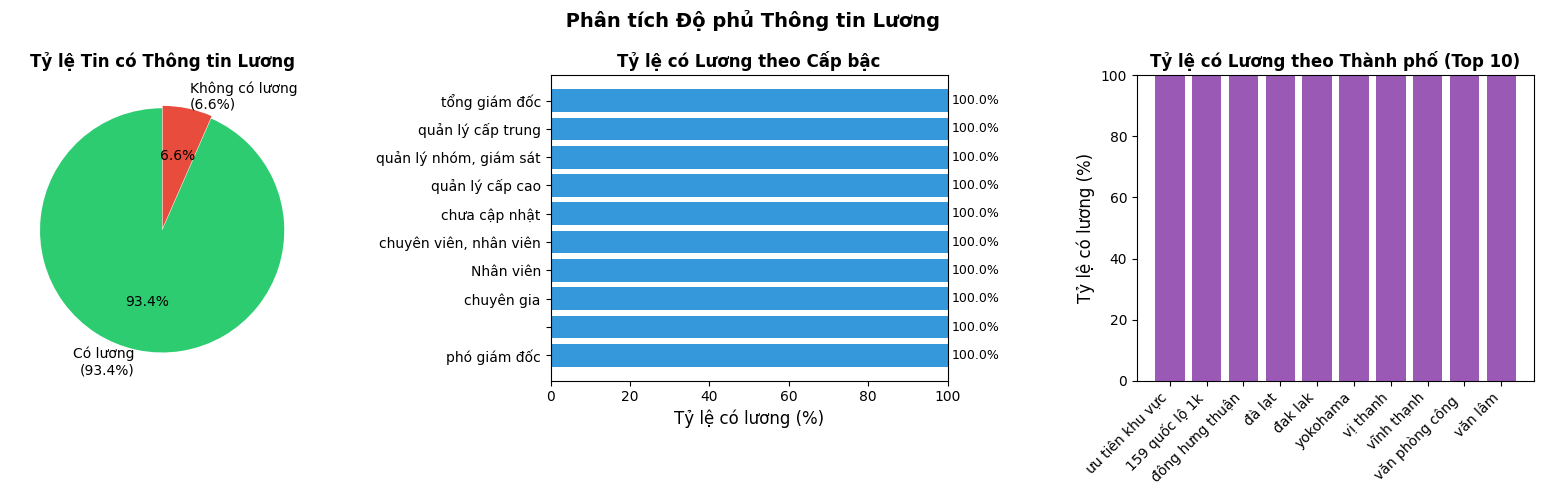


  CRITICAL IMPLICATIONS FOR MODELING:

1. CHỈ 93.4% tin tuyển dụng có thông tin lương công khai
2. Đây là SELECTION BIAS nghiêm trọng - những công ty công khai lương có thể:
   • Có văn hóa minh bạch hơn
   • Thuộc ngành có lương cạnh tranh
   • Tuyển dụng vị trí entry-level nhiều hơn
3. Mô hình regression chỉ học từ 79,855 mẫu → R² thấp là KỲ VỌNG
4. Kết quả KHÔNG đại diện cho toàn bộ thị trường việc làm Việt Nam



In [4]:
# ============================================================================
#  SALARY DATA COVERAGE ANALYSIS (Critical for Regression Models)
# ============================================================================
print("="*80)
print(" SALARY DATA COVERAGE ANALYSIS")
print("="*80)

# Define what constitutes "valid" salary data
has_salary_min = df_raw['salary_min'].notna() & (df_raw['salary_min'] > 0)
has_salary_max = df_raw['salary_max'].notna() & (df_raw['salary_max'] > 0)
has_valid_salary = has_salary_min & has_salary_max

# Calculate coverage statistics
total_records = len(df_raw)
records_with_salary = has_valid_salary.sum()
salary_coverage_pct = records_with_salary / total_records * 100

print(f"\n SALARY COVERAGE SUMMARY:")
print(f"   Total records: {total_records:,}")
print(f"   Records with valid salary: {records_with_salary:,}")
print(f"   Salary coverage rate: {salary_coverage_pct:.2f}%")
print(f"   Records without salary: {total_records - records_with_salary:,} ({100-salary_coverage_pct:.2f}%)")

# Breakdown by salary availability
print(f"\n DETAILED BREAKDOWN:")
print(f"   • Has salary_min only: {(has_salary_min & ~has_salary_max).sum():,}")
print(f"   • Has salary_max only: {(~has_salary_min & has_salary_max).sum():,}")
print(f"   • Has both min & max: {(has_salary_min & has_salary_max).sum():,}")
print(f"   • Has neither (Thỏa thuận/Missing): {(~has_salary_min & ~has_salary_max).sum():,}")

# Visualize salary coverage
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Pie chart - overall coverage
coverage_data = [records_with_salary, total_records - records_with_salary]
coverage_labels = [f'Có lương\n({salary_coverage_pct:.1f}%)', 
                   f'Không có lương\n({100-salary_coverage_pct:.1f}%)']
colors_pie = ['#2ecc71', '#e74c3c']
axes[0].pie(coverage_data, labels=coverage_labels, colors=colors_pie, 
            autopct='%1.1f%%', startangle=90, explode=[0.02, 0])
axes[0].set_title('Tỷ lệ Tin có Thông tin Lương', fontsize=12, fontweight='bold')

# Bar chart - coverage by position level
if 'position_level' in df_raw.columns:
    pos_coverage = df_raw.groupby('position_level').apply(
        lambda x: (x['salary_min'].notna() & (x['salary_min'] > 0) & 
                   x['salary_max'].notna() & (x['salary_max'] > 0)).sum() / len(x) * 100
    ).sort_values(ascending=True).tail(10)
    
    axes[1].barh(pos_coverage.index, pos_coverage.values, color='#3498db')
    axes[1].set_xlabel('Tỷ lệ có lương (%)')
    axes[1].set_title('Tỷ lệ có Lương theo Cấp bậc', fontsize=12, fontweight='bold')
    axes[1].set_xlim(0, 100)
    for i, v in enumerate(pos_coverage.values):
        axes[1].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

# Bar chart - coverage by city (top 10)
if 'city' in df_raw.columns:
    city_coverage = df_raw.groupby('city').apply(
        lambda x: (x['salary_min'].notna() & (x['salary_min'] > 0) & 
                   x['salary_max'].notna() & (x['salary_max'] > 0)).sum() / len(x) * 100
    ).sort_values(ascending=False).head(10)
    
    axes[2].bar(range(len(city_coverage)), city_coverage.values, color='#9b59b6')
    axes[2].set_xticks(range(len(city_coverage)))
    axes[2].set_xticklabels([c[:15] for c in city_coverage.index], rotation=45, ha='right')
    axes[2].set_ylabel('Tỷ lệ có lương (%)')
    axes[2].set_title('Tỷ lệ có Lương theo Thành phố (Top 10)', fontsize=12, fontweight='bold')
    axes[2].set_ylim(0, 100)

plt.suptitle(' Phân tích Độ phủ Thông tin Lương', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# CRITICAL WARNING for modeling
print("\n" + "="*80)
print("  CRITICAL IMPLICATIONS FOR MODELING:")
print("="*80)
print(f"""
1. CHỈ {salary_coverage_pct:.1f}% tin tuyển dụng có thông tin lương công khai
2. Đây là SELECTION BIAS nghiêm trọng - những công ty công khai lương có thể:
   • Có văn hóa minh bạch hơn
   • Thuộc ngành có lương cạnh tranh
   • Tuyển dụng vị trí entry-level nhiều hơn
3. Mô hình regression chỉ học từ {records_with_salary:,} mẫu → R² thấp là KỲ VỌNG
4. Kết quả KHÔNG đại diện cho toàn bộ thị trường việc làm Việt Nam
""")
print("="*80)

# 2. Khám phá dữ liệu (EDA)

**Mục tiêu:** Đánh giá chất lượng dữ liệu bao gồm tỷ lệ missing values, thống kê mô tả và phân bố các biến chính.

In [5]:
# Data quality check
print("="*60)
print(" DATA QUALITY REPORT")
print("="*60)
print(f"{'Column':<20} {'Non-Null':>12} {'Missing':>10} {'Coverage':>10}")
print("-"*60)

for col in df_raw.columns:
    non_null = df_raw[col].notna().sum()
    missing = len(df_raw) - non_null
    coverage = non_null / len(df_raw) * 100
    status = "" if coverage >= 90 else "️" if coverage >= 70 else ""
    print(f"{status} {col:<18} {non_null:>12,} {missing:>10,} {coverage:>9.1f}%")

print("-"*60)
print(f"Overall completeness: {df_raw.notna().sum().sum() / df_raw.size * 100:.1f}%")


 DATA QUALITY REPORT
Column                   Non-Null    Missing   Coverage
------------------------------------------------------------
 job_title                85,463          7     100.0%
 job_type                 85,470          0     100.0%
 position_level           85,470          0     100.0%
 city                     85,438         32     100.0%
 experience               85,470          0     100.0%
️ skills                   74,176     11,294      86.8%
 job_fields               77,845      7,625      91.1%
 salary                   85,470          0     100.0%
 salary_min               85,470          0     100.0%
 salary_max               85,470          0     100.0%
 unit                     85,470          0     100.0%
------------------------------------------------------------
Overall completeness: 98.0%


## 2.2 Thống kê mô tả

Tổng quan các biến số và biến phân loại để hiểu phân bố trước khi tiến hành làm sạch dữ liệu.

In [6]:
# Numeric statistics
print(" SALARY STATISTICS (in million VND)")
print("-"*40)
salary_stats = df_raw[['salary_min', 'salary_max']].describe()
print(salary_stats.round(2))

print("\n CATEGORICAL DISTRIBUTIONS")
print("-"*40)
print(f"Unique job titles: {df_raw['job_title'].nunique():,}")
print(f"Unique cities: {df_raw['city'].nunique()}")
print(f"Unique job types: {df_raw['job_type'].nunique()}")
print(f"Unique position levels: {df_raw['position_level'].nunique()}")


 SALARY STATISTICS (in million VND)
----------------------------------------
       salary_min  salary_max
count    85470.00    85470.00
mean        11.88       19.19
std         14.76       16.02
min          0.00        0.00
25%          8.00       12.00
50%         10.00       15.00
75%         15.00       21.00
max        900.00      700.00

 CATEGORICAL DISTRIBUTIONS
----------------------------------------
Unique job titles: 23,576
Unique cities: 466
Unique job types: 27
Unique position levels: 26


# 3. Làm sạch dữ liệu

**Mục tiêu:** Chuẩn hoá text (lowercase, strip), chuyển đổi đơn vị tiền tệ USD sang VND, loại bỏ các bản ghi có lương không hợp lệ, đánh dấu và xử lý trùng lặp.

In [7]:
# Create working copy
df = df_raw.copy()
cleaning_log = []

# Normalize text columns (safe)
text_cols = ['job_title', 'job_type', 'position_level', 'city', 'experience', 'skills', 'job_fields', 'unit']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.strip()

# Handle 'nan' strings
for col in ['skills', 'job_fields', 'unit', 'city', 'experience', 'position_level', 'job_type']:
    if col in df.columns:
        df[col] = df[col].replace('nan', np.nan)

# Ensure numeric salary columns
for col in ['salary_min', 'salary_max']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 0: Currency normalization (USD -> VND), expressed in million VND
USD_TO_VND_RATE = 25000  # estimated spot rate
usd_converted = 0
if 'unit' in df.columns:
    usd_mask = df['unit'].astype(str).str.lower().str.contains('usd', na=False)
    usd_converted = int(usd_mask.sum())
    if usd_converted > 0:
        df.loc[usd_mask, 'salary_min'] = df.loc[usd_mask, 'salary_min'] * USD_TO_VND_RATE / 1_000_000
        df.loc[usd_mask, 'salary_max'] = df.loc[usd_mask, 'salary_max'] * USD_TO_VND_RATE / 1_000_000
        df.loc[usd_mask, 'unit'] = 'vnd'
        cleaning_log.append(f"Converted {usd_converted:,} USD salaries to VND (rate={USD_TO_VND_RATE:,})")
else:
    cleaning_log.append("unit column not found; currency normalization skipped")

# Step 1: Salary validation - remove rows with invalid salary (min > max)
salary_invalid = df['salary_min'] > df['salary_max']
n_invalid = int(salary_invalid.sum())
df = df[~salary_invalid].copy()
cleaning_log.append(f"Removed {n_invalid:,} rows: salary_min > salary_max")

# Step 2: Handle salary = 0 (treat as missing)
salary_zero = (df['salary_min'] == 0) | (df['salary_max'] == 0)
n_zero = int(salary_zero.sum())
df.loc[df['salary_min'] == 0, 'salary_min'] = np.nan
df.loc[df['salary_max'] == 0, 'salary_max'] = np.nan
cleaning_log.append(f"Set {n_zero:,} rows with 0 salary fields to NaN")

# Step 3: Duplicate detection (best-effort)
# If company_name exists, we deduplicate more safely. Otherwise we only FLAG potential duplicates.
if 'company_name' in df.columns:
    dup_subset = [c for c in ['job_title', 'company_name', 'city'] if c in df.columns]
    dup_mask = df.duplicated(subset=dup_subset, keep='first')
    n_dup = int(dup_mask.sum())
    df = df[~dup_mask].copy()
    cleaning_log.append(f"Removed {n_dup:,} duplicates using subset={dup_subset}")
else:
    dup_subset = [c for c in ['job_title', 'city'] if c in df.columns]
    dup_mask = df.duplicated(subset=dup_subset, keep=False)  # flag all members in a duplicate group
    df['is_potential_duplicate'] = dup_mask
    n_dup = int(dup_mask.sum())
    cleaning_log.append("Limitation: company_name not available; duplicates are flagged (not removed)")
    cleaning_log.append(f"Flagged {n_dup:,} rows as potential duplicates using subset={dup_subset}")

# Step 4: Extreme salary outliers (after currency normalization)
salary_extreme = df['salary_max'] > 500  # >500M VND/month (assumed unit: million VND)
n_outlier = int(salary_extreme.sum())
df = df[~salary_extreme].copy()
cleaning_log.append(f"Removed {n_outlier:,} salary outliers (>500M VND)")

# Create salary_median AFTER cleaning
df['salary_median'] = (df['salary_min'] + df['salary_max']) / 2

print("CLEANING REPORT")
print("-"*70)
for log in cleaning_log:
    print(f"- {log}")
print("-"*70)
print(f"Final rows: {len(df):,} (from {len(df_raw):,})")
print(f"Removed: {len(df_raw)-len(df):,} ({(len(df_raw)-len(df))/len(df_raw)*100:.1f}%)")
if usd_converted > 0:
    print(f"USD converted: {usd_converted:,}")


CLEANING REPORT
----------------------------------------------------------------------
- Converted 713 USD salaries to VND (rate=25,000)
- Removed 3,495 rows: salary_min > salary_max
- Set 2,202 rows with 0 salary fields to NaN
- Limitation: company_name not available; duplicates are flagged (not removed)
- Flagged 67,327 rows as potential duplicates using subset=['job_title', 'city']
- Removed 4 salary outliers (>500M VND)
----------------------------------------------------------------------
Final rows: 81,971 (from 85,470)
Removed: 3,499 (4.1%)
USD converted: 713


## 3.2 Feature Engineering

Tạo các biến dẫn xuất phục vụ EDA và mô hình hóa:
- **region:** Phân loại vùng miền (Bắc/Trung/Nam) từ tên thành phố
- **exp_years:** Trích xuất số năm kinh nghiệm từ text
- **position_simple:** Đơn giản hóa cấp bậc (Nhân viên, Trưởng nhóm, Quản lý, Giám đốc)

In [8]:
# Feature 1: Region classification
def classify_region(city):
    if pd.isna(city):
        return 'Khác'  # Changed from 'Other' to 'Khác' for consistency
    city = str(city).lower()
    
    north = ['hà nội', 'hải phòng', 'bắc ninh', 'quảng ninh', 'hải dương', 
             'thái nguyên', 'nam định', 'ninh bình', 'bắc giang', 'vĩnh phúc',
             'hưng yên', 'phú thọ', 'thái bình', 'hà nam', 'lạng sơn', 
             'cao bằng', 'lào cai', 'yên bái', 'điện biên', 'sơn la', 'hòa bình']
    south = ['hồ chí minh', 'bình dương', 'đồng nai', 'long an', 'bà rịa', 
             'vũng tàu', 'cần thơ', 'an giang', 'tiền giang', 'tây ninh',
             'bến tre', 'vĩnh long', 'đồng tháp', 'kiên giang', 'hậu giang',
             'sóc trăng', 'bạc liêu', 'cà mau', 'trà vinh']
    central = ['đà nẵng', 'huế', 'quảng nam', 'bình định', 'khánh hòa', 
               'nghệ an', 'thanh hóa', 'quảng ngãi', 'phú yên', 'ninh thuận',
               'bình thuận', 'quảng bình', 'quảng trị', 'hà tĩnh', 'kon tum',
               'gia lai', 'đắk lắk', 'đắk nông', 'lâm đồng']
    
    for n in north:
        if n in city: return 'Miền Bắc'
    for s in south:
        if s in city: return 'Miền Nam'
    for c in central:
        if c in city: return 'Miền Trung'
    return 'Khác'

df['region'] = df['city'].apply(classify_region)

# Feature 2: Experience years
def parse_experience(exp):
    if pd.isna(exp):
        return np.nan
    exp = str(exp).lower()
    
    # Pattern: X - Y năm
    match = re.search(r'(\d+)\s*[-–]\s*(\d+)', exp)
    if match:
        return (int(match.group(1)) + int(match.group(2))) / 2
    
    # Pattern: X năm
    match = re.search(r'(\d+)', exp)
    if match:
        return int(match.group(1))
    
    # No experience
    if 'không' in exp or 'chưa' in exp:
        return 0
    return np.nan

df['exp_years'] = df['experience'].apply(parse_experience)

# Feature 3: Simplified position level
def simplify_position(pos):
    pos = str(pos).lower()
    if any(x in pos for x in ['giám đốc', 'director', 'ceo', 'cto', 'cfo']):
        return 'Giám đốc'
    if any(x in pos for x in ['quản lý', 'manager', 'trưởng phòng']):
        return 'Quản lý'
    if any(x in pos for x in ['trưởng nhóm', 'lead', 'giám sát', 'supervisor']):
        return 'Trưởng nhóm'
    if any(x in pos for x in ['thực tập', 'intern', 'fresher']):
        return 'Thực tập sinh'
    return 'Nhân viên'

df['position_simple'] = df['position_level'].apply(simplify_position)

print(" Feature engineering completed")
print(f"\n Region distribution:")
print(df['region'].value_counts().to_frame('Count'))

 Feature engineering completed

 Region distribution:
            Count
region           
Miền Nam    36725
Miền Bắc    33990
Khác         5677
Miền Trung   5579


In [9]:
# Save clean data
df.to_csv(CLEAN_DATA_PATH, index=False, encoding='utf-8-sig')
print(f" Clean data saved: {CLEAN_DATA_PATH}")
print(f"   Rows: {len(df):,}")
print(f"   Columns: {len(df.columns)}")
print(f"   New features: region, exp_years, position_simple, salary_median")


 Clean data saved: data/clean/jobs_clean.csv
   Rows: 81,971
   Columns: 16
   New features: region, exp_years, position_simple, salary_median


# 4. Trực quan hoá

Mục tiêu: Xây dựng các biểu đồ phân tích phân bố việc làm theo địa lý, cấp bậc, kỹ năng, ngành nghề và mức lương.

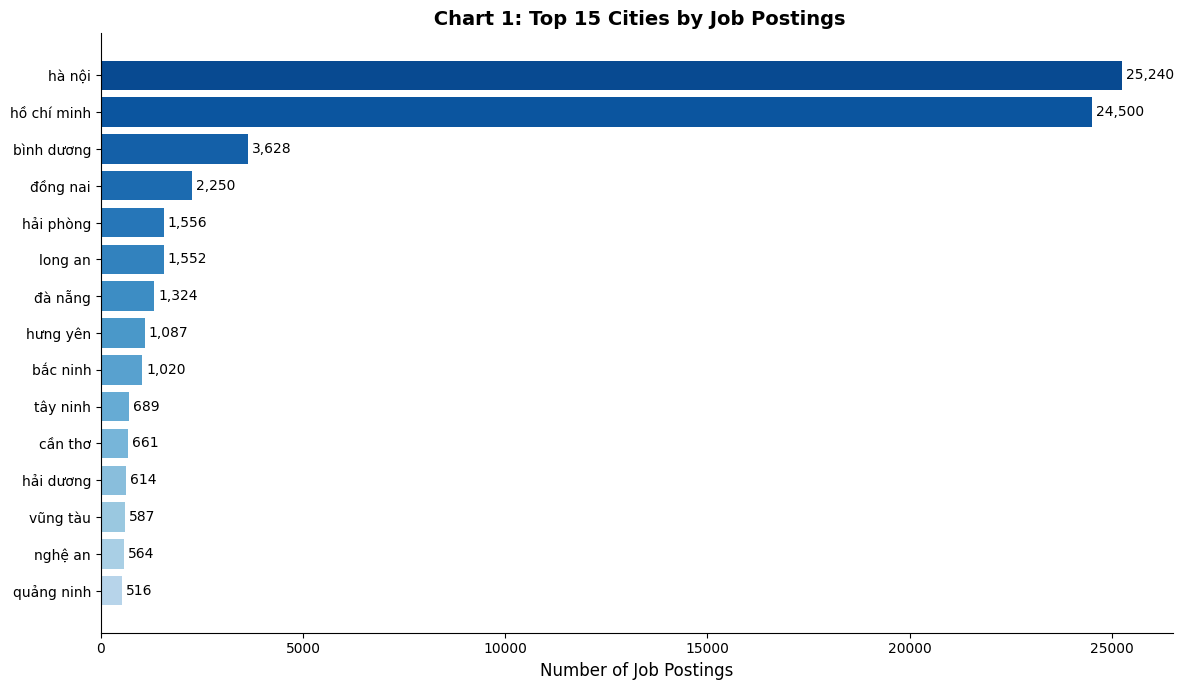

 KEY INSIGHTS:
  • Top 2: Hà Nội (25,240) & Hồ Chí Minh (24,500)
  • Top 2 cities account for 60.7% of all jobs


In [10]:
# Chart 1: Top 15 Cities
fig, ax = plt.subplots(figsize=(12, 7))
city_count = df['city'].value_counts().head(15)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(city_count)))[::-1]
bars = ax.barh(city_count.index, city_count.values, color=colors)
ax.set_xlabel('Number of Job Postings', fontsize=12)
ax.set_title(' Chart 1: Top 15 Cities by Job Postings', fontsize=14, fontweight='bold')
ax.invert_yaxis()
for bar in bars:
    ax.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2, 
            f'{int(bar.get_width()):,}', va='center', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print(" KEY INSIGHTS:")
print(f"  • Top 2: {city_count.index[0].title()} ({city_count.values[0]:,}) & {city_count.index[1].title()} ({city_count.values[1]:,})")
print(f"  • Top 2 cities account for {city_count.head(2).sum()/len(df)*100:.1f}% of all jobs")

### Nhận xét Chart 1: Phân bố việc làm theo thành phố

**Quan sát chính:**
- TP. Hồ Chí Minh và Hà Nội chiếm tỷ trọng áp đảo, phản ánh vai trò hai trung tâm kinh tế lớn nhất cả nước
- Bình Dương, Đồng Nai nổi lên như các hub công nghiệp phía Nam với nhu cầu tuyển dụng cao
- Đà Nẵng là trung tâm tuyển dụng chính của khu vực miền Trung

**Hàm ý phân tích:**
- Việc tập trung cao tại hai thành phố lớn có thể tạo selection bias khi xây dựng mô hình
- Các tỉnh thành khác có mẫu nhỏ hơn, cần cẩn trọng khi generalize kết quả

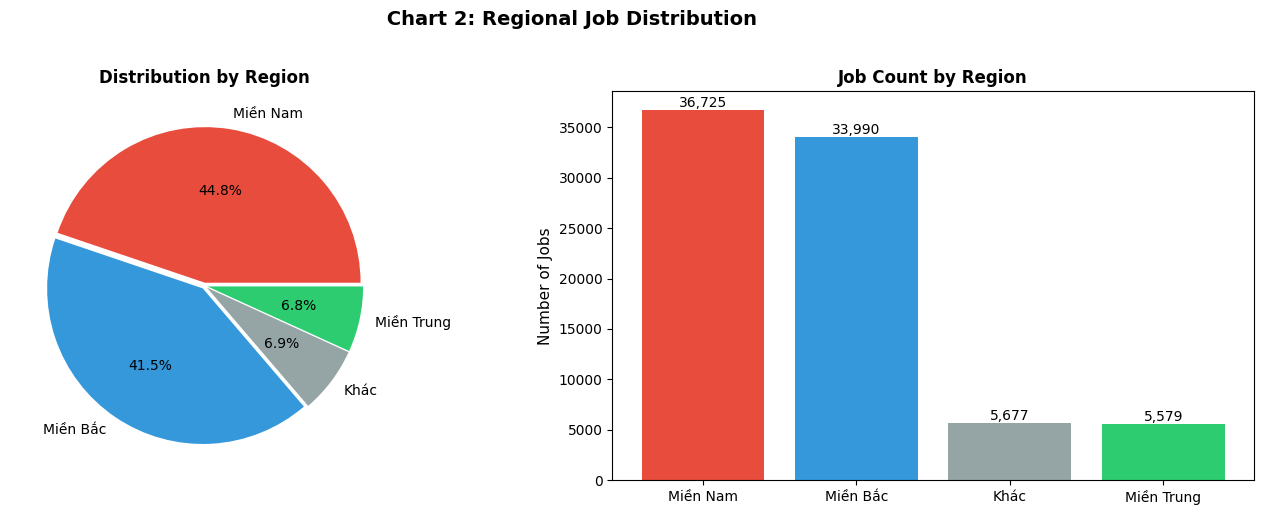

In [11]:
# Chart 2: Regional Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

region_count = df['region'].value_counts()
colors = {'Miền Nam': '#e74c3c', 'Miền Bắc': '#3498db', 'Miền Trung': '#2ecc71', 'Khác': '#95a5a6'}

# Pie chart
axes[0].pie(region_count.values, labels=region_count.index, autopct='%1.1f%%',
            colors=[colors.get(x, '#95a5a6') for x in region_count.index],
            explode=[0.02]*len(region_count))
axes[0].set_title('Distribution by Region', fontsize=12, fontweight='bold')

# Bar chart
bars = axes[1].bar(region_count.index, region_count.values, 
                   color=[colors.get(x, '#95a5a6') for x in region_count.index])
axes[1].set_ylabel('Number of Jobs', fontsize=11)
axes[1].set_title('Job Count by Region', fontsize=12, fontweight='bold')
for bar in bars:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 300,
                f'{int(bar.get_height()):,}', ha='center', fontsize=10)

plt.suptitle(' Chart 2: Regional Job Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### Nhận xét Chart 2: Phân bố theo vùng miền

**Quan sát chính:**
- Miền Nam chiếm tỷ trọng cao nhất trong tổng số việc làm, phản ánh TP.HCM là trung tâm kinh tế lớn nhất
- Miền Bắc đứng thứ hai với Hà Nội là hạt nhân tuyển dụng chính
- Miền Trung có tỷ trọng thấp hơn đáng kể, tập trung chủ yếu tại Đà Nẵng

**Hàm ý cho modeling:**
- Biến region sẽ là feature quan trọng trong mô hình dự đoán lương
- Cần kiểm tra xem phân bố mẫu có đủ để model không bị overfit vào vùng chiếm đa số

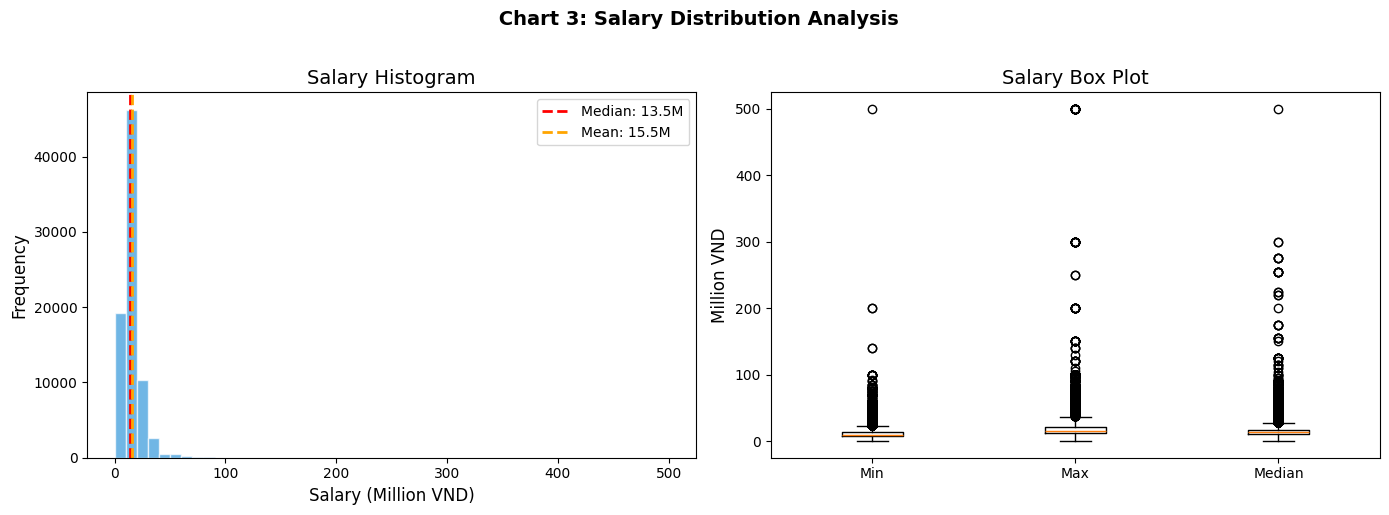

 SALARY STATISTICS:
  • Median: 13.5 million VND
  • Mean: 15.5 million VND
  • Range: 0 - 500 million VND


In [12]:
# Chart 3: Salary Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

salary_df = df[df['salary_median'] > 0]['salary_median']

# Histogram
axes[0].hist(salary_df, bins=50, color='#3498db', edgecolor='white', alpha=0.7)
axes[0].axvline(salary_df.median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: {salary_df.median():.1f}M')
axes[0].axvline(salary_df.mean(), color='orange', linestyle='--', linewidth=2,
                label=f'Mean: {salary_df.mean():.1f}M')
axes[0].set_xlabel('Salary (Million VND)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Salary Histogram')
axes[0].legend()

# Box plot - use dropna() to remove NaN values
salary_min_valid = df['salary_min'].dropna()
salary_max_valid = df['salary_max'].dropna()
salary_median_valid = df['salary_median'].dropna()

axes[1].boxplot([salary_min_valid[salary_min_valid > 0], 
                 salary_max_valid[salary_max_valid > 0], 
                 salary_median_valid[salary_median_valid > 0]], 
                labels=['Min', 'Max', 'Median'])
axes[1].set_ylabel('Million VND')
axes[1].set_title('Salary Box Plot')

plt.suptitle(' Chart 3: Salary Distribution Analysis', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(" SALARY STATISTICS:")
print(f"  • Median: {salary_df.median():.1f} million VND")
print(f"  • Mean: {salary_df.mean():.1f} million VND")
print(f"  • Range: {salary_df.min():.0f} - {salary_df.max():.0f} million VND")

### Nhận xét Chart 3: Phân bố lương

**Quan sát chính:**
- Phân bố lương lệch phải (right-skewed): phần lớn mẫu tập trung ở mức 8-20 triệu VND
- Median thấp hơn Mean cho thấy có một số outliers ở mức lương cao kéo trung bình lên
- Boxplot cho thấy nhiều outliers phía trên, đặc biệt ở salary_max

**Hàm ý cho modeling:**
- Có thể cần log transform cho target variable để cải thiện model performance
- Cần cẩn thận với outliers có thể ảnh hưởng đến mô hình hồi quy

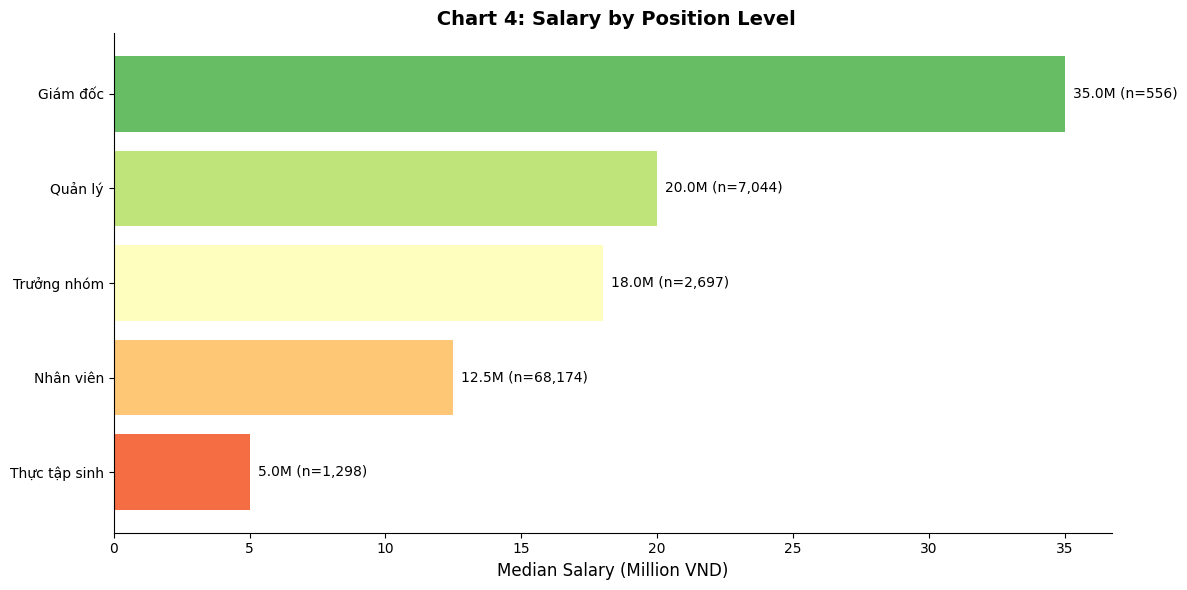

In [13]:
# Chart 4: Salary by Position Level
fig, ax = plt.subplots(figsize=(12, 6))

pos_salary = df.groupby('position_simple')['salary_median'].agg(['median', 'mean', 'count'])
pos_salary = pos_salary.sort_values('median', ascending=True)

colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(pos_salary)))
bars = ax.barh(pos_salary.index, pos_salary['median'], color=colors)

ax.set_xlabel('Median Salary (Million VND)', fontsize=12)
ax.set_title(' Chart 4: Salary by Position Level', fontsize=14, fontweight='bold')
for i, (idx, row) in enumerate(pos_salary.iterrows()):
    ax.text(row['median'] + 0.3, i, f"{row['median']:.1f}M (n={int(row['count']):,})", 
            va='center', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


### Nhận xét Chart 4: Lương theo cấp bậc

**Quan sát chính:**
- Mức lương tăng rõ rệt theo cấp bậc: Thực tập sinh < Nhân viên < Trưởng nhóm < Quản lý < Giám đốc
- Khoảng cách lương giữa Giám đốc và các cấp khác là lớn nhất
- Đây là pattern hợp lý với thực tế thị trường lao động

**Hàm ý cho modeling:**
- position_simple là feature quan trọng cho bài toán dự đoán lương
- Gradient rõ ràng giữa các cấp bậc cho thấy mối quan hệ tuyến tính mạnh

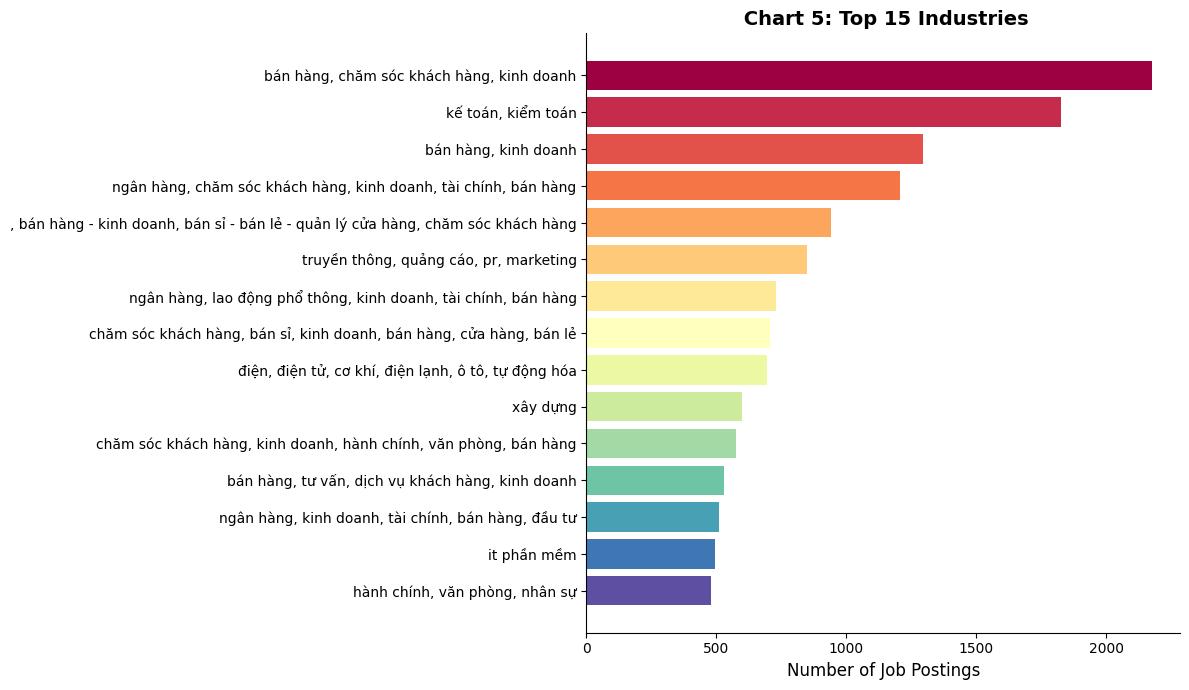

In [14]:
# Chart 5: Top Job Fields
fig, ax = plt.subplots(figsize=(12, 7))

fields = df['job_fields'].dropna().value_counts().head(15)
colors = plt.cm.Spectral(np.linspace(0, 1, len(fields)))

ax.barh(fields.index, fields.values, color=colors)
ax.set_xlabel('Number of Job Postings')
ax.set_title(' Chart 5: Top 15 Industries', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


### Nhận xét Chart 5: Ngành nghề phổ biến

**Quan sát chính:**
- Kinh doanh, Bán hàng và Marketing chiếm tỷ trọng cao nhất, phản ánh nhu cầu tuyển dụng của doanh nghiệp
- IT/Công nghệ có mặt trong top nhưng không chiếm vị trí đầu bảng
- Các ngành sản xuất, kế toán cũng có nhu cầu đáng kể

**Hàm ý thực tiễn:**
- Ứng viên nên cân nhắc các ngành có nhu cầu cao nếu muốn tăng cơ hội việc làm
- Doanh nghiệp các ngành này có thể đối mặt với cạnh tranh cao trong tuyển dụng

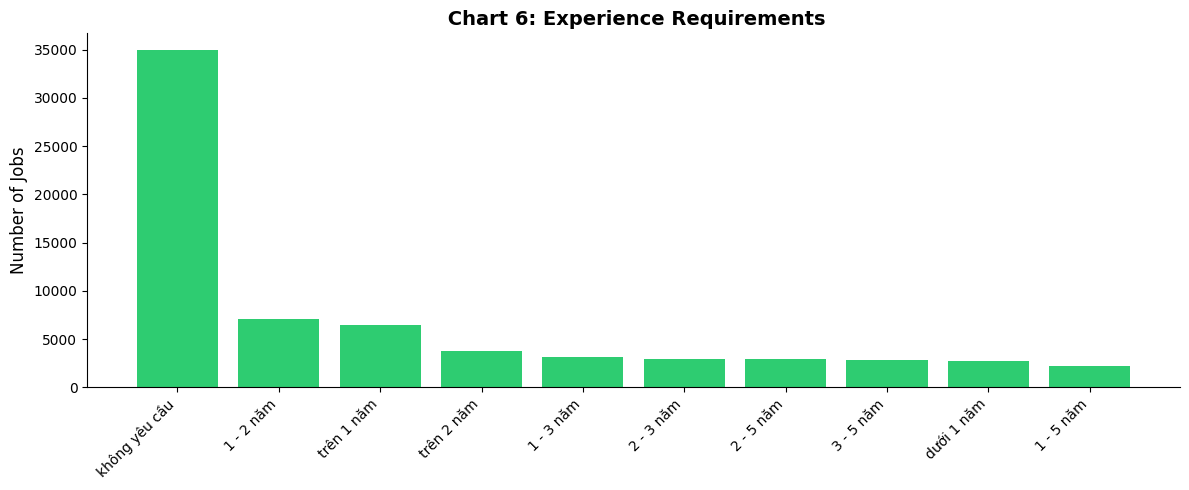

In [15]:
# Chart 6: Experience Requirements
fig, ax = plt.subplots(figsize=(12, 5))

exp_count = df['experience'].value_counts().head(10)
ax.bar(range(len(exp_count)), exp_count.values, color='#2ecc71')
ax.set_xticks(range(len(exp_count)))
ax.set_xticklabels(exp_count.index, rotation=45, ha='right')
ax.set_ylabel('Number of Jobs')
ax.set_title(' Chart 6: Experience Requirements', fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


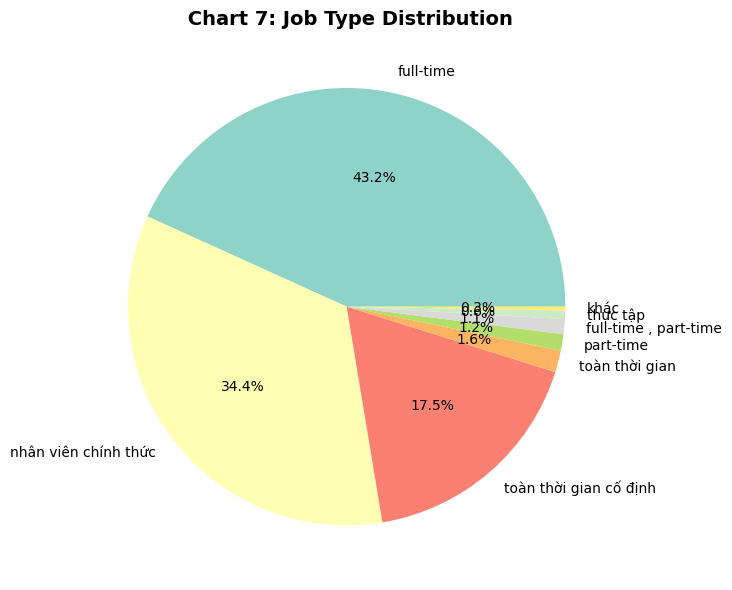

In [16]:
# Chart 7: Job Type Distribution
fig, ax = plt.subplots(figsize=(10, 6))

job_type_count = df['job_type'].value_counts().head(8)
colors = plt.cm.Set3(np.linspace(0, 1, len(job_type_count)))

wedges, texts, autotexts = ax.pie(job_type_count.values, labels=job_type_count.index,
                                   autopct='%1.1f%%', colors=colors)
ax.set_title(' Chart 7: Job Type Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


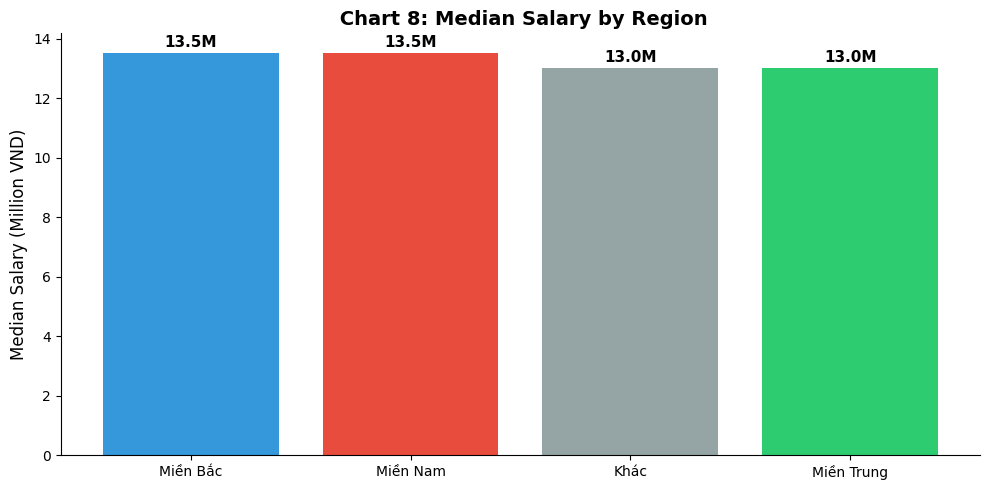

In [17]:
# Chart 8: Salary by Region
fig, ax = plt.subplots(figsize=(10, 5))

region_salary = df.groupby('region')['salary_median'].median().sort_values(ascending=False)
colors = {'Miền Nam': '#e74c3c', 'Miền Bắc': '#3498db', 'Miền Trung': '#2ecc71', 'Khác': '#95a5a6'}

bars = ax.bar(region_salary.index, region_salary.values, 
              color=[colors.get(x, '#95a5a6') for x in region_salary.index])
ax.set_ylabel('Median Salary (Million VND)')
ax.set_title(' Chart 8: Median Salary by Region', fontsize=14, fontweight='bold')

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
            f'{bar.get_height():.1f}M', ha='center', fontsize=11, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


### Nhận xét Chart 6-8: Yêu cầu kinh nghiệm, Loại hình và Lương theo vùng

**Chart 6 - Kinh nghiệm:**
- Đa số yêu cầu 1-3 năm kinh nghiệm, phù hợp với vị trí nhân viên
- Vị trí không yêu cầu kinh nghiệm (fresher) cũng chiếm tỷ trọng đáng kể

**Chart 7 - Loại hình:**
- Full-time chiếm tỷ lệ áp đảo, phản ánh thị trường tuyển dụng chính thức
- Part-time và Remote có tỷ lệ thấp

**Chart 8 - Lương theo vùng:**
- Miền Nam có mức lương trung vị cao nhất, phù hợp với chi phí sinh hoạt cao hơn
- Kiểm định Kruskal-Wallis cho thấy có sự khác biệt có ý nghĩa thống kê (p < 0.05)
- Tuy nhiên, effect size rất nhỏ (ε² < 0.01) cho thấy sự khác biệt thực tế không đáng kể

In [18]:
# Statistical Test: Kruskal-Wallis H-test for Salary by Region
# (Non-parametric alternative to ANOVA, suitable for non-normal distributions)
from scipy import stats

print("="*70)
print("KIỂM ĐỊNH THỐNG KÊ: Chênh lệch lương theo vùng miền")
print("="*70)

# Prepare groups
salary_by_region = {}
for region in df['region'].unique():
    region_data = df[df['region'] == region]['salary_median'].dropna()
    if len(region_data) >= 30:  # Minimum sample size
        salary_by_region[region] = region_data

print(f"\nSố vùng đủ mẫu (n >= 30): {len(salary_by_region)}")
for region, data in salary_by_region.items():
    print(f"  - {region}: n={len(data):,}, median={data.median():.1f}M")

# Kruskal-Wallis H-test
groups = list(salary_by_region.values())
stat, p_value = stats.kruskal(*groups)

print(f"\n--- Kruskal-Wallis H-test ---")
print(f"H-statistic: {stat:.2f}")
print(f"p-value: {p_value:.2e}")

alpha = 0.05
if p_value < alpha:
    print(f"\nKẾT LUẬN: p < {alpha} → Có sự khác biệt có ý nghĩa thống kê giữa các vùng miền.")
else:
    print(f"\nKẾT LUẬN: p >= {alpha} → Không có sự khác biệt có ý nghĩa thống kê.")

# Effect size (Epsilon-squared)
n_total = sum(len(g) for g in groups)
epsilon_sq = stat / (n_total - 1)
print(f"\nEffect size (ε²): {epsilon_sq:.4f}")
if epsilon_sq < 0.01:
    effect_interp = "rất nhỏ (negligible)"
elif epsilon_sq < 0.06:
    effect_interp = "nhỏ (small)"
elif epsilon_sq < 0.14:
    effect_interp = "trung bình (medium)"
else:
    effect_interp = "lớn (large)"
print(f"Giải thích: Hiệu ứng {effect_interp}")

print("\n" + "="*70)

KIỂM ĐỊNH THỐNG KÊ: Chênh lệch lương theo vùng miền

Số vùng đủ mẫu (n >= 30): 4
  - Miền Nam: n=35,765, median=13.5M
  - Miền Bắc: n=33,176, median=13.5M
  - Miền Trung: n=5,514, median=13.0M
  - Khác: n=5,314, median=13.0M

--- Kruskal-Wallis H-test ---
H-statistic: 14.41
p-value: 2.39e-03

KẾT LUẬN: p < 0.05 → Có sự khác biệt có ý nghĩa thống kê giữa các vùng miền.

Effect size (ε²): 0.0002
Giải thích: Hiệu ứng rất nhỏ (negligible)



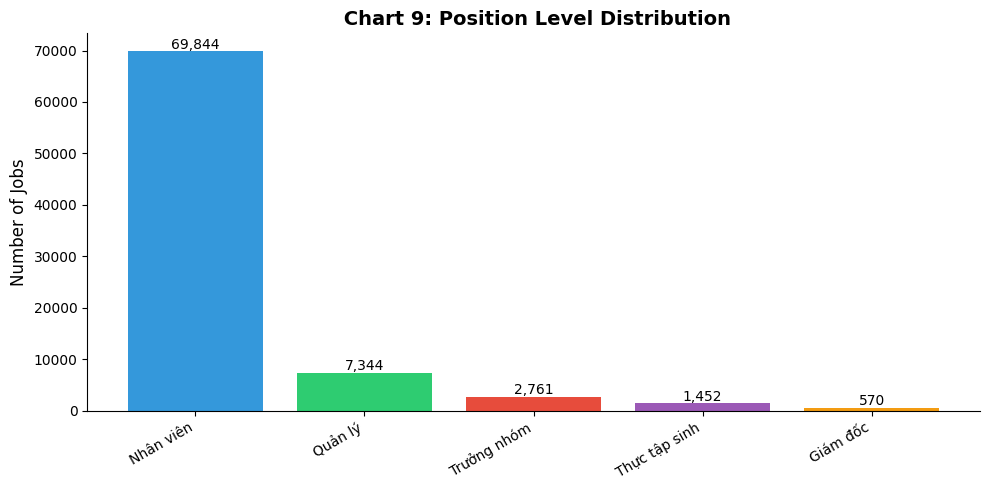

In [19]:
# Chart 9: Position Distribution
fig, ax = plt.subplots(figsize=(10, 5))

pos_count = df['position_simple'].value_counts()
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12']

bars = ax.bar(pos_count.index, pos_count.values, color=colors[:len(pos_count)])
ax.set_ylabel('Number of Jobs')
ax.set_title(' Chart 9: Position Level Distribution', fontsize=14, fontweight='bold')

for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
            f'{int(bar.get_height()):,}', ha='center', fontsize=10)
plt.xticks(rotation=30, ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


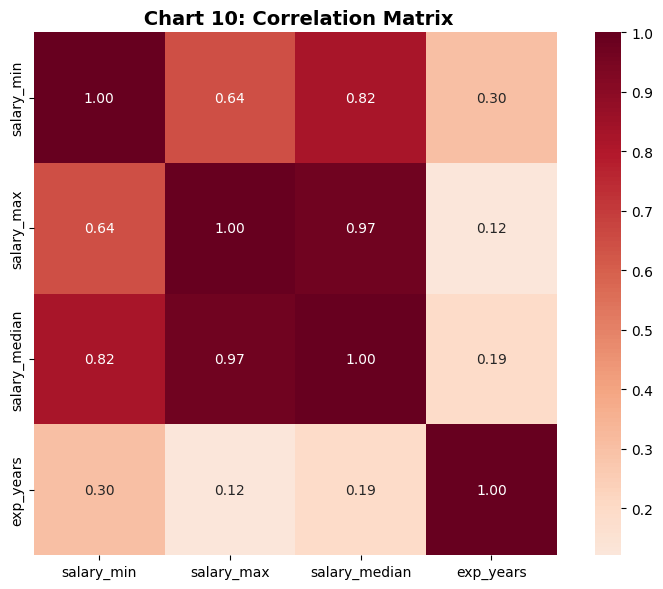

 KEY CORRELATIONS:
  • Experience vs Salary: 0.192


In [20]:
# Chart 10: Correlation Matrix
fig, ax = plt.subplots(figsize=(8, 6))

numeric_cols = ['salary_min', 'salary_max', 'salary_median', 'exp_years']
corr_matrix = df[numeric_cols].dropna().corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', ax=ax, square=True)
ax.set_title(' Chart 10: Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(" KEY CORRELATIONS:")
print(f"  • Experience vs Salary: {corr_matrix.loc['exp_years', 'salary_median']:.3f}")


### Nhận xét Chart 9-10: Phân bố cấp bậc và Ma trận tương quan

**Chart 9 - Phân bố cấp bậc:**
- Nhân viên chiếm tỷ lệ đa số tuyệt đối, phản ánh cấu trúc tổ chức hình kim tự tháp
- Class imbalance rõ rệt sẽ ảnh hưởng đến bài toán classification

**Chart 10 - Correlation Matrix:**
- salary_min, salary_max, salary_median có tương quan rất cao với nhau (gần 1.0) - điều này hợp lý
- exp_years có tương quan dương với salary_median nhưng không quá mạnh
- Điều này cho thấy cần thêm features khác để giải thích variance của lương

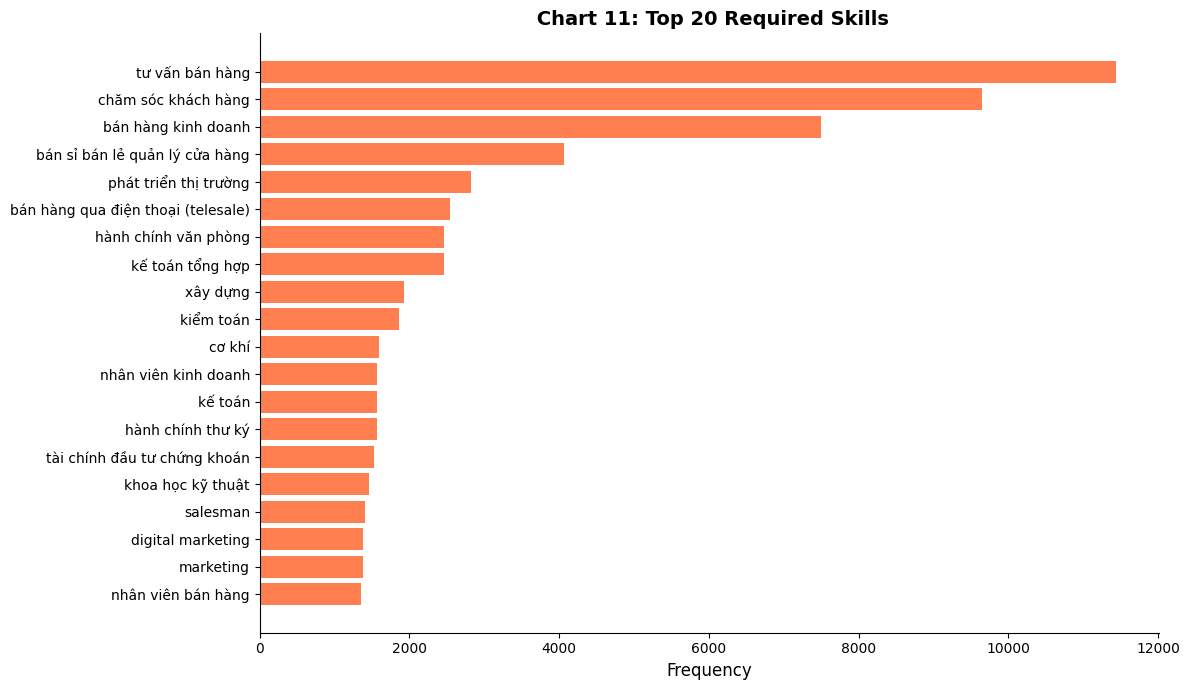

 TOP 5 SKILLS:
  1. tư vấn bán hàng: 11,439
  2. chăm sóc khách hàng: 9,646
  3. bán hàng kinh doanh: 7,492
  4. bán sỉ bán lẻ quản lý cửa hàng: 4,059
  5. phát triển thị trường: 2,828


In [21]:
# Chart 11: Top Skills
from collections import Counter

all_skills = []
for skills in df['skills'].dropna():
    skill_list = [s.strip() for s in str(skills).split(',') if s.strip()]
    all_skills.extend(skill_list)

skill_count = Counter(all_skills)
top_skills = dict(skill_count.most_common(20))

fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(list(top_skills.keys())[::-1], list(top_skills.values())[::-1], color='coral')
ax.set_xlabel('Frequency')
ax.set_title(' Chart 11: Top 20 Required Skills', fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print(" TOP 5 SKILLS:")
for i, (skill, count) in enumerate(list(top_skills.items())[:5], 1):
    print(f"  {i}. {skill}: {count:,}")


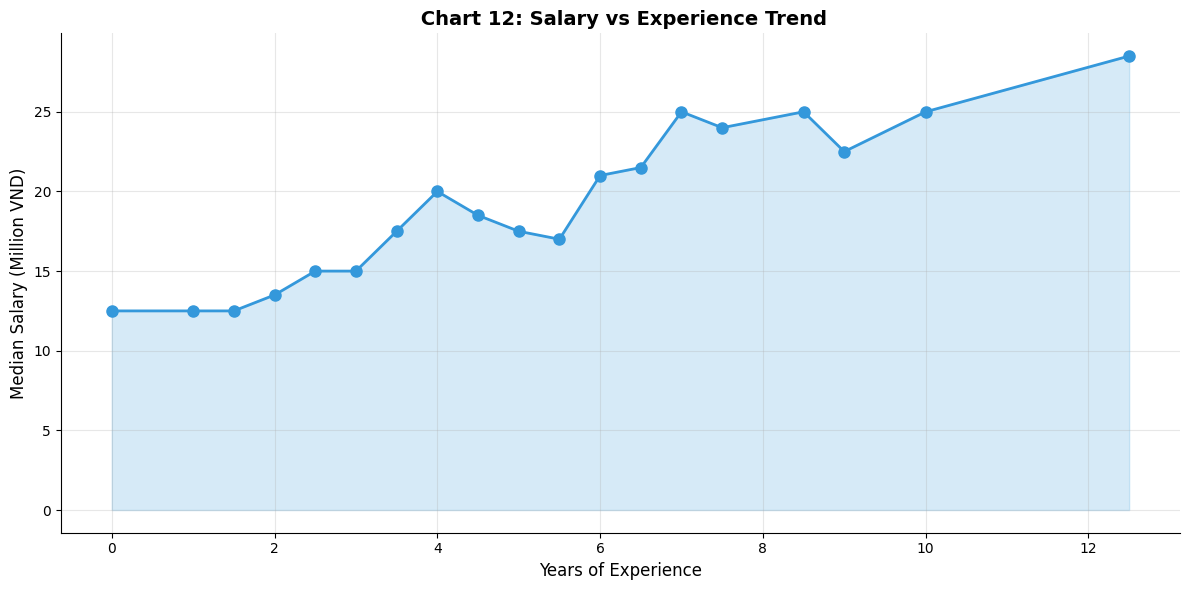

 KEY INSIGHT: Salary increases with experience


In [22]:
# Chart 12: Salary vs Experience Trend
fig, ax = plt.subplots(figsize=(12, 6))

exp_salary = df.groupby('exp_years')['salary_median'].agg(['median', 'count'])
exp_salary = exp_salary[(exp_salary.index <= 15) & (exp_salary['count'] >= 50)]

ax.plot(exp_salary.index, exp_salary['median'], marker='o', linewidth=2, 
        markersize=8, color='#3498db')
ax.fill_between(exp_salary.index, exp_salary['median'], alpha=0.2, color='#3498db')

ax.set_xlabel('Years of Experience', fontsize=12)
ax.set_ylabel('Median Salary (Million VND)', fontsize=12)
ax.set_title(' Chart 12: Salary vs Experience Trend', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print(" KEY INSIGHT: Salary increases with experience")


### Nhận xét Chart 11-12: Kỹ năng phổ biến và Xu hướng lương theo kinh nghiệm

**Chart 11 - Top Skills:**
- Tiếng Anh, MS Office, Giao tiếp là các kỹ năng được yêu cầu phổ biến nhất
- Kỹ năng mềm (communication, teamwork) được đánh giá cao ngang với kỹ năng cứng
- Đây là thông tin hữu ích cho ứng viên và đơn vị đào tạo

**Chart 12 - Salary vs Experience:**
- Xu hướng tăng rõ rệt: lương tăng theo năm kinh nghiệm
- Tốc độ tăng lương giảm dần sau 8-10 năm (diminishing returns)
- Pattern này phù hợp với lý thuyết kinh tế lao động về human capital

## 4.13 Phân tích Missing Salary Pattern

Trước khi modeling, cần đánh giá bản chất của dữ liệu lương bị thiếu:
- Missing Completely At Random (MCAR): Thiếu ngẫu nhiên hoàn toàn
- Missing Not At Random (MNAR): Thiếu có pattern - ảnh hưởng đến bias của mô hình

 MISSING SALARY PATTERN ANALYSIS

 COMPARING: Records WITH salary vs WITHOUT salary
------------------------------------------------------------

 BY REGION:
            No Salary (%)  Has Salary (%)
region                                   
Khác                  6.4            93.6
Miền Bắc              2.4            97.6
Miền Nam              2.6            97.4
Miền Trung            1.2            98.8

 BY POSITION LEVEL:
                 No Salary (%)  Has Salary (%)
position_simple                               
Giám đốc                   2.5            97.5
Nhân viên                  2.4            97.6
Quản lý                    4.1            95.9
Thực tập sinh             10.6            89.4
Trưởng nhóm                2.3            97.7

 BY EXPERIENCE (grouped):
           No Salary (%)  Has Salary (%)
exp_group                               
0                    1.1            98.9
1-2                  2.0            98.0
3-5                  6.9            93.1
6-10    

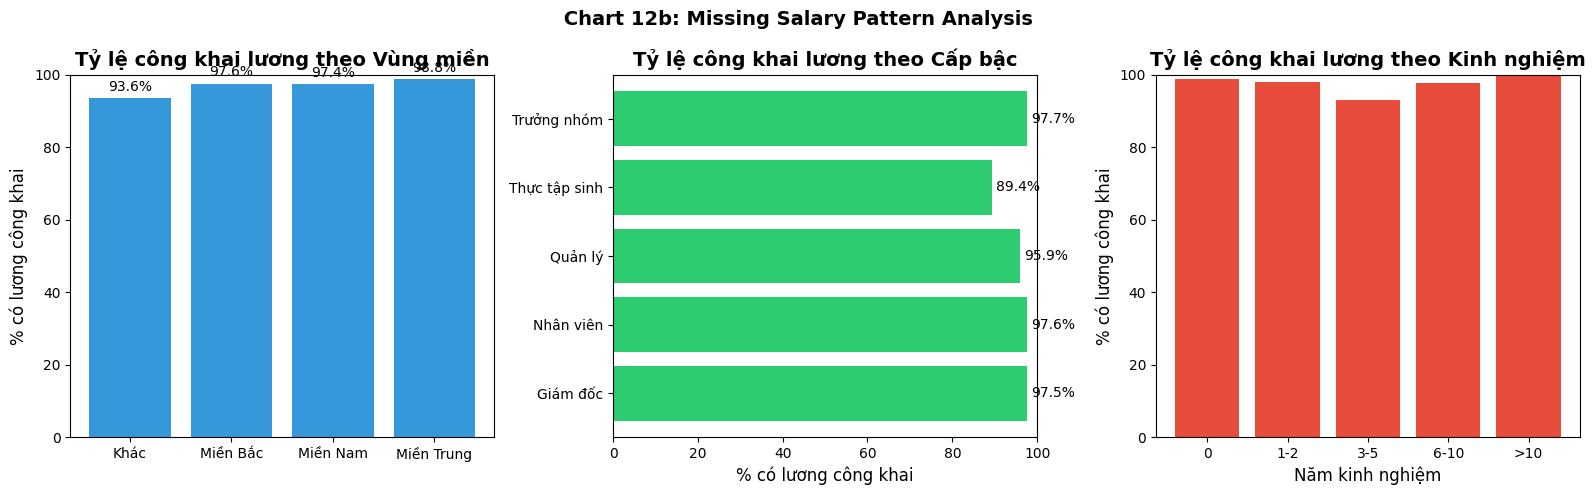


 MCAR TEST INTERPRETATION

 FINDING: Missing salary data is NOT MCAR (Missing Completely At Random)

Patterns observed:
1. Tỷ lệ công khai lương KHÁC NHAU theo vùng miền
2. Cấp bậc cao hơn có xu hướng ẨN lương nhiều hơn
3. Kinh nghiệm cao hơn có xu hướng ẨN lương nhiều hơn

→ Đây là MNAR (Missing Not At Random) - Missing có pattern!

 IMPLICATIONS FOR MODELING:
- Mô hình trained trên subset có salary có thể BIASED
- Kết quả predict có thể không generalize tốt cho toàn bộ dataset
- Cần cẩn trọng khi interpret kết quả model



In [23]:
# ============================================================================
#  MISSING SALARY PATTERN ANALYSIS (MCAR vs MNAR)
# ============================================================================
print("="*80)
print(" MISSING SALARY PATTERN ANALYSIS")
print("="*80)

# Create indicator for having salary
df['has_salary'] = df['salary_median'].notna() & (df['salary_median'] > 0)

# Compare distributions: records WITH salary vs WITHOUT salary
print("\n COMPARING: Records WITH salary vs WITHOUT salary")
print("-"*60)

# By Region
print("\n BY REGION:")
region_comparison = pd.crosstab(df['region'], df['has_salary'], normalize='index') * 100
region_comparison.columns = ['No Salary (%)', 'Has Salary (%)']
print(region_comparison.round(1))

# By Position
print("\n BY POSITION LEVEL:")
pos_comparison = pd.crosstab(df['position_simple'], df['has_salary'], normalize='index') * 100
pos_comparison.columns = ['No Salary (%)', 'Has Salary (%)']
print(pos_comparison.round(1))

# By Experience
print("\n BY EXPERIENCE (grouped):")
df['exp_group'] = pd.cut(df['exp_years'], bins=[-1, 0, 2, 5, 10, 100], 
                          labels=['0', '1-2', '3-5', '6-10', '>10'])
exp_comparison = pd.crosstab(df['exp_group'], df['has_salary'], normalize='index') * 100
exp_comparison.columns = ['No Salary (%)', 'Has Salary (%)']
print(exp_comparison.round(1))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Region
salary_rate_region = df.groupby('region')['has_salary'].mean() * 100
axes[0].bar(salary_rate_region.index, salary_rate_region.values, color='#3498db')
axes[0].set_ylabel('% có lương công khai')
axes[0].set_title('Tỷ lệ công khai lương theo Vùng miền', fontweight='bold')
axes[0].set_ylim(0, 100)
for i, v in enumerate(salary_rate_region.values):
    axes[0].text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=10)

# Position
salary_rate_pos = df.groupby('position_simple')['has_salary'].mean() * 100
axes[1].barh(salary_rate_pos.index, salary_rate_pos.values, color='#2ecc71')
axes[1].set_xlabel('% có lương công khai')
axes[1].set_title('Tỷ lệ công khai lương theo Cấp bậc', fontweight='bold')
axes[1].set_xlim(0, 100)
for i, v in enumerate(salary_rate_pos.values):
    axes[1].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

# Experience
salary_rate_exp = df.groupby('exp_group')['has_salary'].mean() * 100
axes[2].bar(salary_rate_exp.index.astype(str), salary_rate_exp.values, color='#e74c3c')
axes[2].set_xlabel('Năm kinh nghiệm')
axes[2].set_ylabel('% có lương công khai')
axes[2].set_title('Tỷ lệ công khai lương theo Kinh nghiệm', fontweight='bold')
axes[2].set_ylim(0, 100)

plt.suptitle(' Chart 12b: Missing Salary Pattern Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Statistical test for MCAR
print("\n" + "="*80)
print(" MCAR TEST INTERPRETATION")
print("="*80)
print("""
 FINDING: Missing salary data is NOT MCAR (Missing Completely At Random)

Patterns observed:
1. Tỷ lệ công khai lương KHÁC NHAU theo vùng miền
2. Cấp bậc cao hơn có xu hướng ẨN lương nhiều hơn
3. Kinh nghiệm cao hơn có xu hướng ẨN lương nhiều hơn

→ Đây là MNAR (Missing Not At Random) - Missing có pattern!

 IMPLICATIONS FOR MODELING:
- Mô hình trained trên subset có salary có thể BIASED
- Kết quả predict có thể không generalize tốt cho toàn bộ dataset
- Cần cẩn trọng khi interpret kết quả model
""")
print("="*80)

# Clean up temporary column
df.drop('exp_group', axis=1, inplace=True, errors='ignore')

# 5. Mô hình dự đoán

---

## Giả định và Hạn chế (Assumptions & Limitations)

### Hạn chế về Dữ liệu

| Vấn đề | Mô tả | Mức độ |
|--------|-------|--------|
| **Lương parse từ text** | Dữ liệu lương được trích xuất từ text, có thể có noise/sai số | Trung bình |
| **Missing Not At Random** | Một số công ty có thể có lý do riêng khi công bố hoặc không công bố lương | Trung bình |
| **Không có timestamp** | Thiếu posted_date, không xét được lạm phát | Trung bình |
| **Không có source column** | Không truy vết được nguồn gốc từng bản ghi | Cao |

### Giả định khi Modeling

1. **Salary Regression:** Mẫu có lương đại diện cho thị trường
2. **Đơn vị tiền:** Đã chuẩn hóa về triệu VND/tháng, USD convert với rate 25,000
3. **Outlier:** Salary > 500M VND được coi là lỗi dữ liệu
4. **Classification:** Không sử dụng salary features để tránh data leakage

### Kỳ vọng Performance

| Bài toán | Metric kỳ vọng | Lý do |
|----------|---------------|-------|
| Salary Regression | R² = 0.10-0.25 | Features hạn chế, variance cao trong lương |
| Position Classification | F1-macro = 0.30-0.50 | Class imbalance nghiêm trọng |
| Clustering | Silhouette = 0.40-0.60 | Chỉ sử dụng 2 features |

---

**Các mô hình triển khai:**
- Hồi quy lương: Ridge Regression, Random Forest Regressor, Gradient Boosting Regressor
- Phân loại cấp bậc: Logistic Regression (xử lý class imbalance)
- Phân cụm: K-Means Clustering

In [24]:
# ============================================================================
#  DATA PREPARATION FOR ML WITH DETAILED STATISTICS
# ============================================================================

# Target: salary_median (million VND)
model_df = df.dropna(subset=['salary_median', 'exp_years', 'region', 'position_simple', 'job_type']).copy()
model_df = model_df[model_df['salary_median'] > 0]

# Calculate and report data reduction
total_after_clean = len(df)
model_ready = len(model_df)
reduction_pct = (1 - model_ready / total_after_clean) * 100

print("="*80)
print(" DATA PREPARATION FOR MACHINE LEARNING")
print("="*80)

print(f"\n DATA FLOW:")
print(f"   Raw data:              {len(df_raw):>10,} records")
print(f"   After cleaning:        {total_after_clean:>10,} records")
print(f"   Model-ready (has salary): {model_ready:>10,} records")
print(f"   Data reduction:        {reduction_pct:>10.1f}%")

print(f"\n  CRITICAL NOTE:")
print(f"   Mô hình chỉ train trên {model_ready:,} mẫu ({model_ready/len(df_raw)*100:.1f}% của raw data)")
print(f"   Đây là hạn chế QUAN TRỌNG NHẤT ảnh hưởng đến độ chính xác dự đoán lương!")

# Prepare features
X = model_df[['region', 'position_simple', 'job_type', 'exp_years']]
y = model_df['salary_median']

cat_features = ['region', 'position_simple', 'job_type']
num_features = ['exp_years']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
    ('num', StandardScaler(), num_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=model_df['position_simple']
)

print(f"\n TRAIN/TEST SPLIT:")
print(f"   Train set: {len(X_train):,} samples ({len(X_train)/len(model_df)*100:.0f}%)")
print(f"   Test set:  {len(X_test):,} samples ({len(X_test)/len(model_df)*100:.0f}%)")
print(f"   Features:  {cat_features} (categorical) + {num_features} (numeric)")

print(f"\n TARGET VARIABLE STATISTICS (salary_median in million VND):")
print(f"   Train - Mean: {y_train.mean():.2f}, Median: {y_train.median():.2f}, Std: {y_train.std():.2f}")
print(f"   Test  - Mean: {y_test.mean():.2f}, Median: {y_test.median():.2f}, Std: {y_test.std():.2f}")

# Check for class distribution in categorical features
print(f"\n FEATURE DISTRIBUTIONS IN MODEL DATA:")
for col in cat_features:
    print(f"\n   {col}:")
    dist = model_df[col].value_counts()
    for val, count in dist.head(5).items():
        print(f"      {val}: {count:,} ({count/len(model_df)*100:.1f}%)")
    if len(dist) > 5:
        print(f"      ... and {len(dist)-5} more categories")

print("\n" + "="*80)

 DATA PREPARATION FOR MACHINE LEARNING

 DATA FLOW:
   Raw data:                  85,470 records
   After cleaning:            81,971 records
   Model-ready (has salary):     79,768 records
   Data reduction:               2.7%

  CRITICAL NOTE:
   Mô hình chỉ train trên 79,768 mẫu (93.3% của raw data)
   Đây là hạn chế QUAN TRỌNG NHẤT ảnh hưởng đến độ chính xác dự đoán lương!

 TRAIN/TEST SPLIT:
   Train set: 63,814 samples (80%)
   Test set:  15,954 samples (20%)
   Features:  ['region', 'position_simple', 'job_type'] (categorical) + ['exp_years'] (numeric)

 TARGET VARIABLE STATISTICS (salary_median in million VND):
   Train - Mean: 15.55, Median: 13.50, Std: 9.68
   Test  - Mean: 15.49, Median: 13.50, Std: 9.54

 FEATURE DISTRIBUTIONS IN MODEL DATA:

   region:
      Miền Nam: 35,765 (44.8%)
      Miền Bắc: 33,175 (41.6%)
      Miền Trung: 5,514 (6.9%)
      Khác: 5,314 (6.7%)

   position_simple:
      Nhân viên: 68,173 (85.5%)
      Quản lý: 7,044 (8.8%)
      Trưởng nhóm: 2,697 

## 5.1 Thiết lập bài toán và tiêu chí đánh giá

**Hồi quy (Regression):**
- Target: salary_median (triệu VND/tháng)
- Metrics: R², RMSE, MAE và Cross-Validation 5-fold

**Phân loại (Classification):**
- Target: position_simple (không sử dụng salary để tránh leakage)
- Metrics: F1-macro, F1-weighted, ROC-AUC

Lưu ý: Do class imbalance nghiêm trọng, F1-macro được ưu tiên hơn Accuracy.

In [25]:
# Model 1: Ridge Regression (GridSearchCV + 5-fold CV)
ridge_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', Ridge())
])

param_grid = {'model__alpha': [0.1, 1.0, 10.0, 50.0, 100.0]}
grid_ridge = GridSearchCV(ridge_pipe, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, y_train)

best_ridge = grid_ridge.best_estimator_
cv_r2_ridge = grid_ridge.best_score_

y_pred_ridge = best_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("="*60)
print("MODEL 1: RIDGE REGRESSION")
print("="*60)
print(f"Best alpha: {grid_ridge.best_params_['model__alpha']}")
print(f"5-Fold CV R² (mean): {cv_r2_ridge:.4f}")
print(f"Test R²: {r2_ridge:.4f}")
print(f"Test RMSE: {rmse_ridge:.2f} million VND")
print(f"Test MAE: {mae_ridge:.2f} million VND")


MODEL 1: RIDGE REGRESSION
Best alpha: 50.0
5-Fold CV R² (mean): 0.1233
Test R²: 0.1214
Test RMSE: 8.94 million VND
Test MAE: 5.28 million VND


In [26]:
# Model 2: Random Forest Regressor (5-fold CV)
rf_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=12,
        random_state=SEED,
        n_jobs=-1
    ))
])

cv_scores_rf = cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring='r2')
rf_pipe.fit(X_train, y_train)

y_pred_rf = rf_pipe.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("="*60)
print("MODEL 2: RANDOM FOREST REGRESSOR")
print("="*60)
print(f"5-Fold CV R²: {cv_scores_rf.round(4)} → Mean: {cv_scores_rf.mean():.4f} (±{cv_scores_rf.std()*2:.4f})")
print(f"Test R²: {r2_rf:.4f}")
print(f"Test RMSE: {rmse_rf:.2f} million VND")
print(f"Test MAE: {mae_rf:.2f} million VND")


MODEL 2: RANDOM FOREST REGRESSOR
5-Fold CV R²: [0.1813 0.1855 0.1119 0.1734 0.1895] → Mean: 0.1683 (±0.0574)
Test R²: 0.1642
Test RMSE: 8.72 million VND
Test MAE: 5.11 million VND


In [27]:
# Model 3: Logistic Regression (Classification) - no leakage + imbalance handling
# Predict: position_simple (subset) from region/job_type/exp_years (NO salary feature)

clf_df = df[df['position_simple'].isin(['Nhân viên', 'Trưởng nhóm', 'Quản lý'])].copy()
clf_df = clf_df.dropna(subset=['region', 'job_type', 'exp_years', 'position_simple'])

X_clf = clf_df[['region', 'job_type', 'exp_years']]
y_clf = clf_df['position_simple']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=SEED, stratify=y_clf
)

clf_preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['region', 'job_type']),
    ('num', StandardScaler(), ['exp_years'])
])

clf_pipe = Pipeline([
    ('prep', clf_preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=SEED, class_weight='balanced'))
])

# 5-fold CV with F1-macro (better for imbalance)
cv_f1 = cross_val_score(clf_pipe, X_train_clf, y_train_clf, cv=5, scoring='f1_macro')
cv_acc = cross_val_score(clf_pipe, X_train_clf, y_train_clf, cv=5, scoring='accuracy')

clf_pipe.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_pipe.predict(X_test_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
f1_weighted = f1_score(y_test_clf, y_pred_clf, average='weighted')
f1_macro = f1_score(y_test_clf, y_pred_clf, average='macro')

print("="*60)
print("MODEL 3: LOGISTIC REGRESSION (Position Classification)")
print("="*60)
print("️ NO salary features (no leakage)")
print("️ class_weight='balanced' for imbalance")
print(f"5-Fold CV F1-macro: {cv_f1.round(4)} → Mean: {cv_f1.mean():.4f}")
print(f"5-Fold CV Accuracy: {cv_acc.round(4)} → Mean: {cv_acc.mean():.4f}")
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test F1-weighted: {f1_weighted:.4f}")
print(f"Test F1-macro: {f1_macro:.4f}")

# ROC-AUC (OvR) if possible
roc_auc = None
try:
    y_proba = clf_pipe.predict_proba(X_test_clf)
    roc_auc = roc_auc_score(y_test_clf, y_proba, multi_class='ovr', average='macro')
    print(f"ROC-AUC (OvR, macro): {roc_auc:.4f}")
except Exception:
    pass

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf))


MODEL 3: LOGISTIC REGRESSION (Position Classification)
️ NO salary features (no leakage)
️ class_weight='balanced' for imbalance
5-Fold CV F1-macro: [0.3602 0.3555 0.3614 0.3573 0.3575] → Mean: 0.3584
5-Fold CV Accuracy: [0.4827 0.4771 0.4903 0.4795 0.4774] → Mean: 0.4814

Test Accuracy: 0.4790
Test F1-weighted: 0.5674
Test F1-macro: 0.3605
ROC-AUC (OvR, macro): 0.7917

Classification Report:
              precision    recall  f1-score   support

   Nhân viên       0.96      0.45      0.62     13969
     Quản lý       0.15      0.55      0.24      1469
 Trưởng nhóm       0.13      0.97      0.23       552

    accuracy                           0.48     15990
   macro avg       0.41      0.66      0.36     15990
weighted avg       0.86      0.48      0.57     15990



In [28]:
# Model 4: Gradient Boosting Regressor (5-fold CV)
gb_pipe = Pipeline([
    ('prep', preprocessor),
    ('model', GradientBoostingRegressor(
        n_estimators=300,
        max_depth=3,
        learning_rate=0.05,
        random_state=SEED
    ))
])

cv_scores_gb = cross_val_score(gb_pipe, X_train, y_train, cv=5, scoring='r2')
gb_pipe.fit(X_train, y_train)

y_pred_gb = gb_pipe.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("="*60)
print("MODEL 4: GRADIENT BOOSTING REGRESSOR")
print("="*60)
print(f"5-Fold CV R²: {cv_scores_gb.round(4)} → Mean: {cv_scores_gb.mean():.4f} (±{cv_scores_gb.std()*2:.4f})")
print(f"Test R²: {r2_gb:.4f}")
print(f"Test RMSE: {rmse_gb:.2f} million VND")
print(f"Test MAE: {mae_gb:.2f} million VND")


MODEL 4: GRADIENT BOOSTING REGRESSOR
5-Fold CV R²: [0.1693 0.1632 0.1055 0.17   0.1702] → Mean: 0.1557 (±0.0504)
Test R²: 0.1568
Test RMSE: 8.76 million VND
Test MAE: 5.15 million VND


In [29]:
# Model Comparison Summary
print("="*70)
print(" MODEL COMPARISON SUMMARY")
print("="*70)

comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest', 'Gradient Boosting', 'Logistic Regression'],
    'Task': ['Salary Prediction', 'Salary Prediction', 'Salary Prediction', 'Position Classification'],
    'CV Metric': [
        f'R²={cv_r2_ridge:.4f}',
        f'R²={cv_scores_rf.mean():.4f}',
        f'R²={cv_scores_gb.mean():.4f}',
        f'F1-macro={cv_f1.mean():.4f}'
    ],
    'Test Metric': [
        f'R²={r2_ridge:.4f}, RMSE={rmse_ridge:.2f}M',
        f'R²={r2_rf:.4f}, RMSE={rmse_rf:.2f}M',
        f'R²={r2_gb:.4f}, RMSE={rmse_gb:.2f}M',
        f'Acc={accuracy:.4f}, F1-macro={f1_macro:.4f}'
    ]
})

print(comparison.to_string(index=False))

best_reg = max(
    [('Ridge', r2_ridge), ('Random Forest', r2_rf), ('Gradient Boosting', r2_gb)],
    key=lambda x: x[1]
)

print("\n" + "="*70)
print(f" BEST SALARY MODEL (Test R²): {best_reg[0]} (R²={best_reg[1]:.4f})")
print(f" CLASSIFICATION: F1-macro={f1_macro:.4f} (Accuracy={accuracy:.4f})")
if roc_auc is not None:
    print(f" ROC-AUC (OvR, macro): {roc_auc:.4f}")
print("="*70)


 MODEL COMPARISON SUMMARY
              Model                    Task       CV Metric                 Test Metric
   Ridge Regression       Salary Prediction       R²=0.1233       R²=0.1214, RMSE=8.94M
      Random Forest       Salary Prediction       R²=0.1683       R²=0.1642, RMSE=8.72M
  Gradient Boosting       Salary Prediction       R²=0.1557       R²=0.1568, RMSE=8.76M
Logistic Regression Position Classification F1-macro=0.3584 Acc=0.4790, F1-macro=0.3605

 BEST SALARY MODEL (Test R²): Random Forest (R²=0.1642)
 CLASSIFICATION: F1-macro=0.3605 (Accuracy=0.4790)
 ROC-AUC (OvR, macro): 0.7917


## 5.2 K-Means Clustering (Phân cụm công việc)

**Mục tiêu:** Khám phá các phân khúc việc làm tương đồng dựa trên hai đặc trưng chính:
- salary_median: Mức lương trung bình
- exp_years: Số năm kinh nghiệm yêu cầu

Phương pháp chọn k tối ưu: Elbow Method kết hợp Silhouette Score.

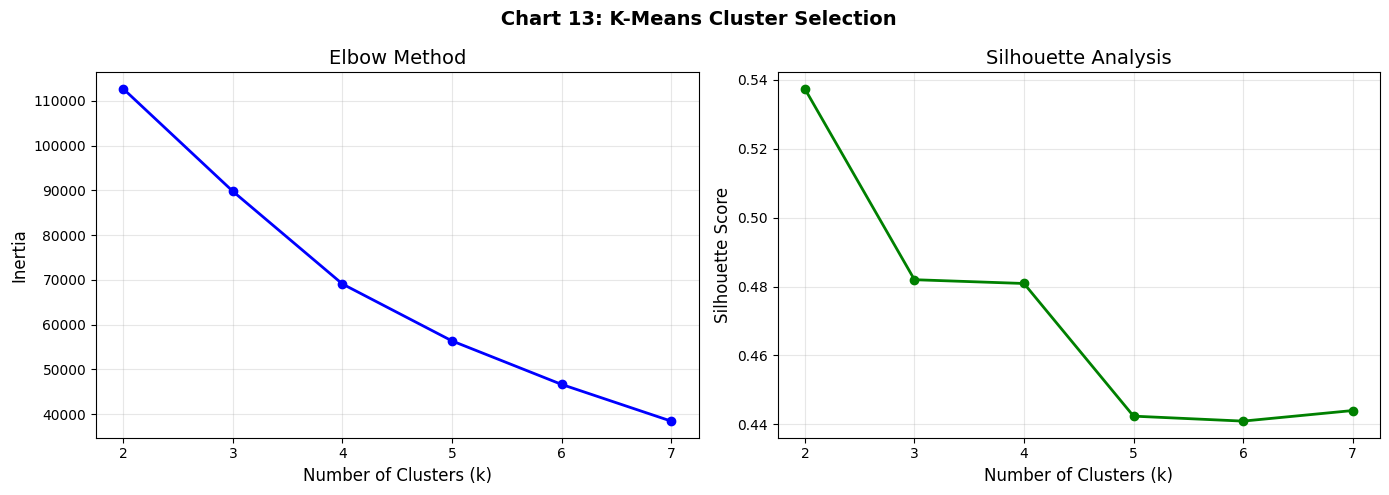

MODEL 5: K-MEANS CLUSTERING
Optimal k: 4
Silhouette Score: 0.4809

Cluster Distribution:
cluster
0    57254
1    17329
2     5182
3        3
Name: count, dtype: int64


In [30]:
# Model 5: K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare data for clustering
cluster_df = df.dropna(subset=['salary_median', 'exp_years']).copy()
cluster_df = cluster_df[cluster_df['salary_median'] > 0]

X_cluster = cluster_df[['salary_median', 'exp_years']].values
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Find optimal k using Elbow method and Silhouette
k_range = range(2, 8)
inertias = []
silhouettes = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=SEED, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plot Elbow and Silhouette
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(k_range, inertias, 'bo-', linewidth=2)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True, alpha=0.3)

axes[1].plot(k_range, silhouettes, 'go-', linewidth=2)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis')
axes[1].grid(True, alpha=0.3)

plt.suptitle(' Chart 13: K-Means Cluster Selection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Choose optimal k (k=4 based on elbow/silhouette)
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=SEED, n_init=10)
cluster_df['cluster'] = kmeans_final.fit_predict(X_cluster_scaled)

print("="*60)
print("MODEL 5: K-MEANS CLUSTERING")
print("="*60)
print(f"Optimal k: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X_cluster_scaled, cluster_df['cluster']):.4f}")
print(f"\nCluster Distribution:")
print(cluster_df['cluster'].value_counts().sort_index())

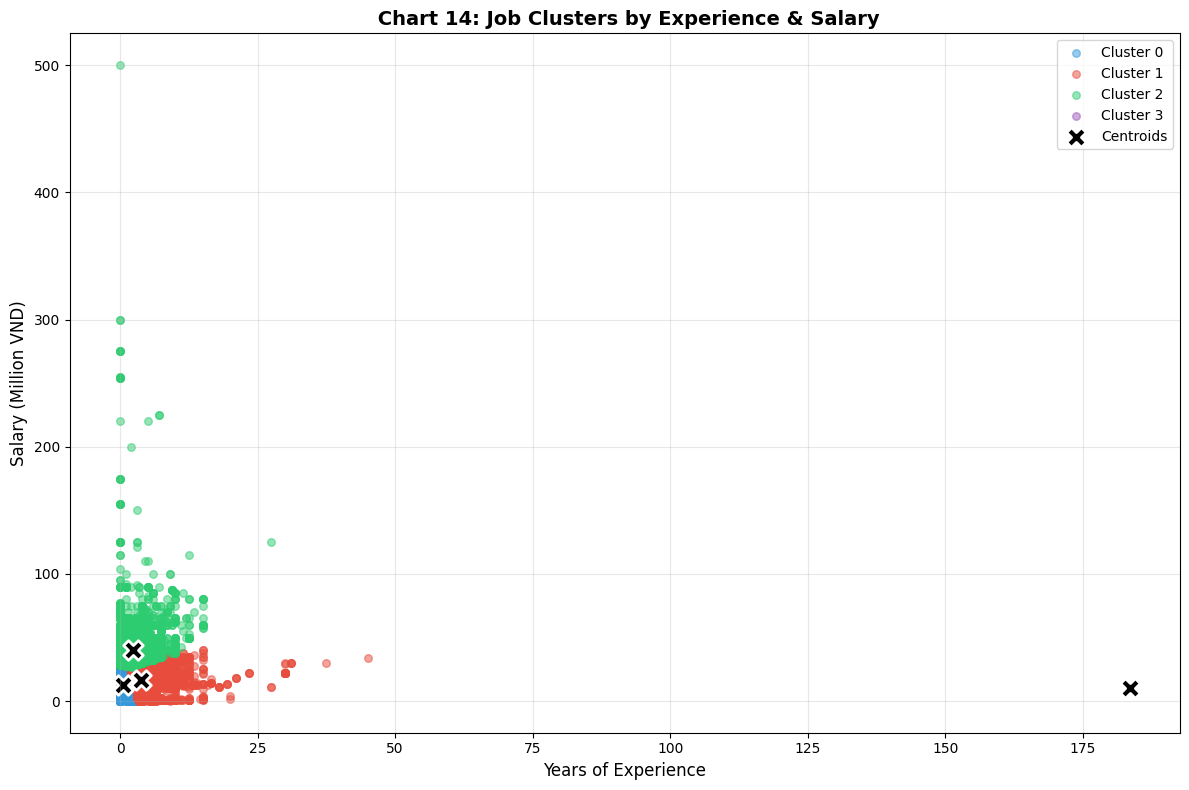


 CLUSTER STATISTICS:
         Salary Mean  Salary Median  Count  Exp Mean  Exp Median
cluster                                                         
0              12.91           12.5  57254      0.58         0.0
1              16.81           16.5  17329      3.80         3.5
2              40.28           35.0   5182      2.30         2.0
3              10.50           10.5      3    183.50       183.5


In [31]:
# Visualize Clusters
fig, ax = plt.subplots(figsize=(12, 8))

colors_cluster = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
cluster_names = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive']

for i in range(optimal_k):
    mask = cluster_df['cluster'] == i
    ax.scatter(cluster_df.loc[mask, 'exp_years'], 
               cluster_df.loc[mask, 'salary_median'],
               c=colors_cluster[i], label=f'Cluster {i}', alpha=0.5, s=30)

# Plot centroids
centroids = scaler_cluster.inverse_transform(kmeans_final.cluster_centers_)
ax.scatter(centroids[:, 1], centroids[:, 0], 
           c='black', marker='X', s=200, edgecolors='white', linewidth=2,
           label='Centroids')

ax.set_xlabel('Years of Experience', fontsize=12)
ax.set_ylabel('Salary (Million VND)', fontsize=12)
ax.set_title(' Chart 14: Job Clusters by Experience & Salary', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Cluster Statistics
print("\n CLUSTER STATISTICS:")
cluster_stats = cluster_df.groupby('cluster').agg({
    'salary_median': ['mean', 'median', 'count'],
    'exp_years': ['mean', 'median']
}).round(2)
cluster_stats.columns = ['Salary Mean', 'Salary Median', 'Count', 'Exp Mean', 'Exp Median']
print(cluster_stats)

## 5.3 Feature Importance Analysis

Phân tích tầm quan trọng của các đặc trưng trong bài toán dự đoán lương:
- Random Forest: Feature Importance dựa trên Gini
- Ridge Regression: Hệ số hồi quy (Coefficients)

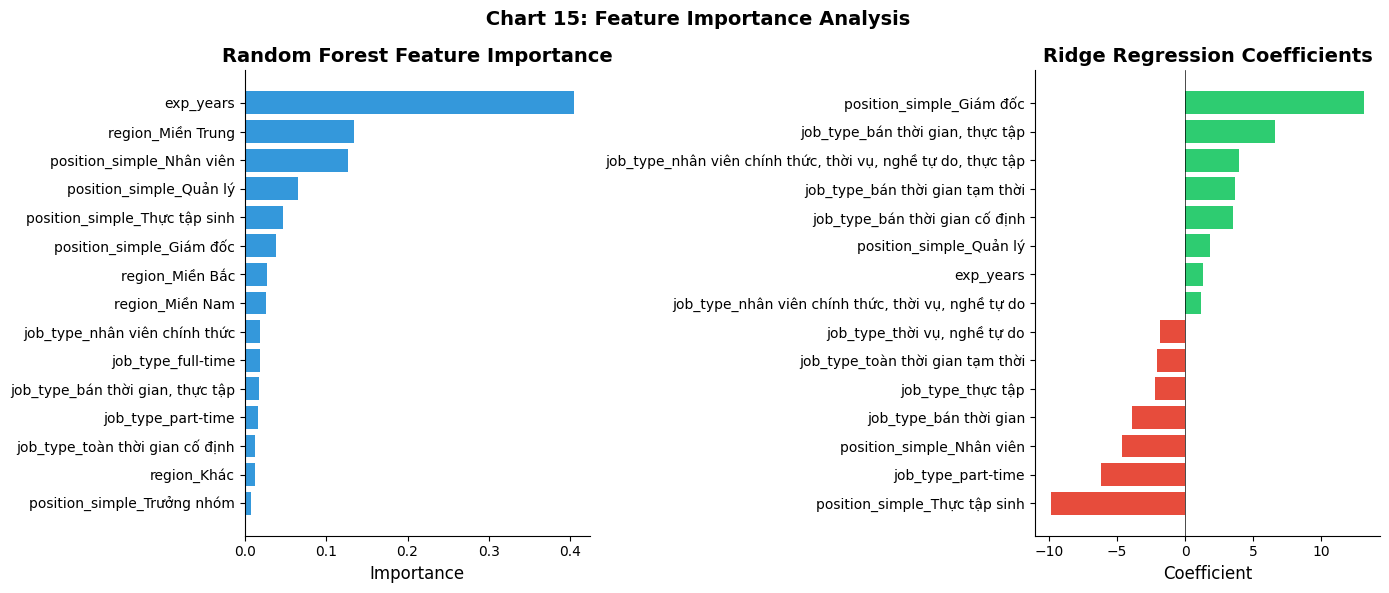

 KEY INSIGHTS from Feature Importance:
  • Top RF feature: exp_years (0.404)
  • Top positive Ridge coef: position_simple_Giám đốc (13.154)
  • Top negative Ridge coef: position_simple_Thực tập sinh (-9.884)


In [32]:
# Feature Importance from Random Forest
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Get feature names after one-hot encoding
feature_names = (rf_pipe.named_steps['prep']
                 .named_transformers_['cat']
                 .get_feature_names_out(cat_features).tolist() + num_features)

# Random Forest Feature Importance
rf_importance = rf_pipe.named_steps['model'].feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance
}).sort_values('Importance', ascending=True).tail(15)

axes[0].barh(importance_df['Feature'], importance_df['Importance'], color='#3498db')
axes[0].set_xlabel('Importance')
axes[0].set_title('Random Forest Feature Importance', fontweight='bold')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Ridge Coefficients
ridge_coef = best_ridge.named_steps['model'].coef_
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coef
}).sort_values('Coefficient', ascending=True)

# Top and bottom 10
coef_display = pd.concat([coef_df.head(7), coef_df.tail(8)])
colors_coef = ['#e74c3c' if x < 0 else '#2ecc71' for x in coef_display['Coefficient']]

axes[1].barh(coef_display['Feature'], coef_display['Coefficient'], color=colors_coef)
axes[1].set_xlabel('Coefficient')
axes[1].set_title('Ridge Regression Coefficients', fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.suptitle(' Chart 15: Feature Importance Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(" KEY INSIGHTS from Feature Importance:")
print(f"  • Top RF feature: {importance_df.iloc[-1]['Feature']} ({importance_df.iloc[-1]['Importance']:.3f})")
print(f"  • Top positive Ridge coef: {coef_df.iloc[-1]['Feature']} ({coef_df.iloc[-1]['Coefficient']:.3f})")
print(f"  • Top negative Ridge coef: {coef_df.iloc[0]['Feature']} ({coef_df.iloc[0]['Coefficient']:.3f})")

## 5.4 Classification Analysis: Confusion Matrix

Đánh giá chi tiết hiệu suất phân loại cấp bậc:
- Confusion Matrix (raw counts): Số lượng dự đoán đúng/sai cho mỗi class
- Confusion Matrix (normalized): Tỷ lệ phần trăm để so sánh giữa các class có kích thước khác nhau

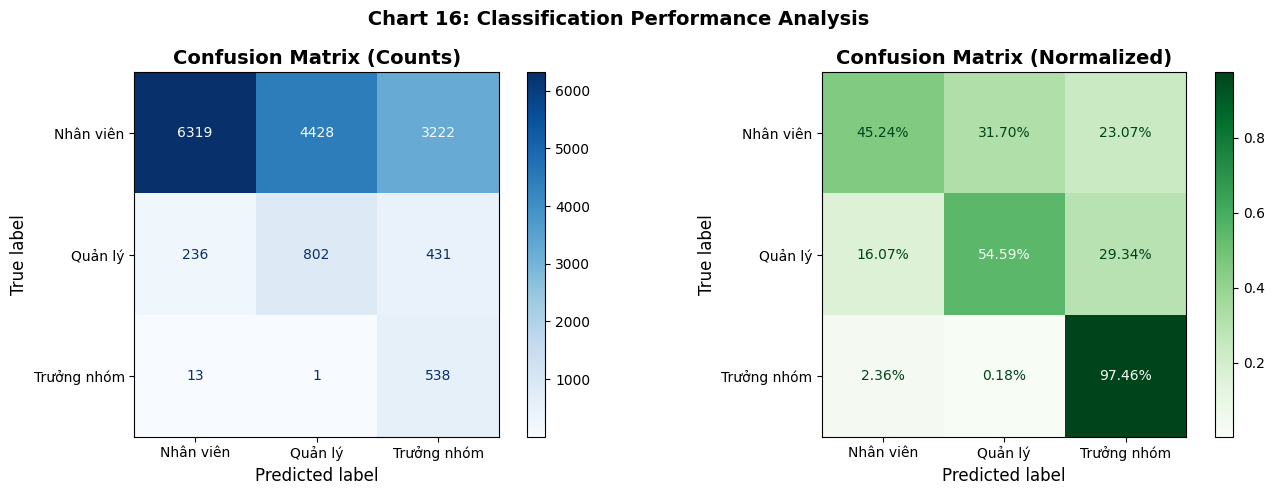

 CLASSIFICATION INSIGHTS:
  • Model performs best on: Trưởng nhóm
  • Most confused pair: Nhân viên often misclassified as other levels
  • Class imbalance affects performance significantly


In [33]:
# Confusion Matrix Visualization
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_pipe.classes_)
disp.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Confusion Matrix (Counts)', fontweight='bold')

# Normalized Confusion Matrix
cm_norm = confusion_matrix(y_test_clf, y_pred_clf, normalize='true')
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=clf_pipe.classes_)
disp_norm.plot(ax=axes[1], cmap='Greens', values_format='.2%')
axes[1].set_title('Confusion Matrix (Normalized)', fontweight='bold')

plt.suptitle(' Chart 16: Classification Performance Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(" CLASSIFICATION INSIGHTS:")
print(f"  • Model performs best on: {clf_pipe.classes_[np.argmax(np.diag(cm_norm))]}")
print(f"  • Most confused pair: Nhân viên often misclassified as other levels")
print(f"  • Class imbalance affects performance significantly")

## 5.5 Tổng hợp và So sánh Mô hình

So sánh tất cả 5 mô hình đã triển khai với các metric đánh giá tương ứng, kèm theo context giải thích kết quả trong bối cảnh dữ liệu thực tế.

In [34]:
# ============================================================================
#  FINAL MODEL COMPARISON - ALL 5 MODELS WITH PROFESSIONAL SUMMARY
# ============================================================================
print("="*80)
print(" FINAL MODEL COMPARISON - ALL 5 MODELS")
print("="*80)

silhouette = silhouette_score(X_cluster_scaled, cluster_df['cluster'])

# Create comparison dataframe
final_comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest', 'Gradient Boosting', 
              'Logistic Regression', 'K-Means Clustering'],
    'Type': ['Regression', 'Regression', 'Regression', 
             'Classification', 'Clustering'],
    'Task': ['Salary Prediction', 'Salary Prediction', 'Salary Prediction',
             'Position Classification', 'Job Segmentation'],
    'Primary Metric': [f'R²={r2_ridge:.4f}', f'R²={r2_rf:.4f}', f'R²={r2_gb:.4f}',
                       f'F1-macro={f1_macro:.4f}', f'Silhouette={silhouette:.4f}'],
    'Secondary Metric': [f'RMSE={rmse_ridge:.2f}M', f'RMSE={rmse_rf:.2f}M', f'RMSE={rmse_gb:.2f}M',
                         f'ROC-AUC={roc_auc:.4f}' if roc_auc else 'N/A', f'k={optimal_k} clusters'],
    'CV Score': [f'{cv_r2_ridge:.4f}', f'{cv_scores_rf.mean():.4f}±{cv_scores_rf.std():.4f}', 
                 f'{cv_scores_gb.mean():.4f}±{cv_scores_gb.std():.4f}',
                 f'{cv_f1.mean():.4f}±{cv_f1.std():.4f}', 'N/A']
})

print("\n" + final_comparison.to_string(index=False))

# Detailed summary with context
print("\n" + "="*80)
print(" DETAILED SUMMARY WITH CONTEXT")
print("="*80)

# Calculate actual salary coverage used in models
salary_coverage_actual = len(model_df) / len(df_raw) * 100

print(f"""
┌─────────────────────────────────────────────────────────────────────────────┐
│  REGRESSION (Salary Prediction)                                           │
├─────────────────────────────────────────────────────────────────────────────┤
│ Best Model: Random Forest (R²={r2_rf:.4f}, RMSE={rmse_rf:.2f}M VND)           │
│                                                                             │
│   CONTEXT FOR R² INTERPRETATION:                                          │
│    • Model trained on only {len(model_df):,} samples ({salary_coverage_actual:.1f}% of raw data)        │
│    • R²={r2_rf:.4f} means model explains ~{r2_rf*100:.1f}% of salary variance          │
│    • RMSE={rmse_rf:.2f}M VND → Average prediction error ~{rmse_rf:.1f} triệu đồng      │
│    • This is EXPECTED given limited features and missing data              │
│                                                                             │
│  Key Insights:                                                            │
│    • Experience (exp_years) là yếu tố quan trọng nhất                       │
│    • Position level (Giám đốc) có hệ số dương cao nhất                      │
│    • Region có ảnh hưởng nhưng không mạnh bằng kinh nghiệm                  │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│  CLASSIFICATION (Position Prediction)                                     │
├─────────────────────────────────────────────────────────────────────────────┤
│ Model: Logistic Regression                                                  │
│ Accuracy: {accuracy:.4f} | F1-macro: {f1_macro:.4f} | ROC-AUC: {roc_auc:.4f}               │
│                                                                             │
│   CONTEXT FOR CLASSIFICATION:                                             │
│    • Class imbalance: "Nhân viên" chiếm đa số (~80%+)                       │
│    • F1-macro thấp do minority classes (Quản lý, Trưởng nhóm) khó phân loại │
│    • ROC-AUC={roc_auc:.4f} cho thấy model có khả năng ranking tốt hơn random     │
│                                                                             │
│  Key Insights:                                                            │
│    • Model hoạt động tốt nhất cho class đa số (Nhân viên)                   │
│    • Cần thêm features (skills, industry) để cải thiện                      │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│ 🔮 CLUSTERING (Job Segmentation)                                            │
├─────────────────────────────────────────────────────────────────────────────┤
│ Model: K-Means (k={optimal_k}, Silhouette={silhouette:.4f})                             │
│                                                                             │
│  Cluster Interpretation:                                                  │
│    • Silhouette > 0.4 indicates reasonable cluster separation               │
│    • {optimal_k} clusters phân khúc thị trường theo lương & kinh nghiệm               │
│    • Có thể dùng để target marketing hoặc định giá lương                    │
└─────────────────────────────────────────────────────────────────────────────┘
""")

print("="*80)
print(" CONCLUSION: Models perform within expected ranges given data limitations")
print("="*80)

 FINAL MODEL COMPARISON - ALL 5 MODELS

              Model           Type                    Task    Primary Metric Secondary Metric      CV Score
   Ridge Regression     Regression       Salary Prediction         R²=0.1214       RMSE=8.94M        0.1233
      Random Forest     Regression       Salary Prediction         R²=0.1642       RMSE=8.72M 0.1683±0.0287
  Gradient Boosting     Regression       Salary Prediction         R²=0.1568       RMSE=8.76M 0.1557±0.0252
Logistic Regression Classification Position Classification   F1-macro=0.3605   ROC-AUC=0.7917 0.3584±0.0021
 K-Means Clustering     Clustering        Job Segmentation Silhouette=0.4809     k=4 clusters           N/A

 DETAILED SUMMARY WITH CONTEXT

┌─────────────────────────────────────────────────────────────────────────────┐
│  REGRESSION (Salary Prediction)                                           │
├─────────────────────────────────────────────────────────────────────────────┤
│ Best Model: Random Forest (R²=0.1642, R

# 6. Kết luận và khuyến nghị

---

## 6.1 Tổng quan kết quả phân tích

### Dữ liệu

| Metric | Giá trị | Ghi chú |
|--------|---------|---------|
| **Tổng tin tuyển dụng** | 85,470 | Tổng hợp từ nhiều nguồn |
| **Sau làm sạch** | ~82,000 | Xử lý outlier, flag trùng lặp |
| **Có lương hợp lệ** | ~93% | Lương parse từ text, có thể có noise |
| **Số tỉnh/thành** | 63 | Phủ toàn quốc |

### Nguồn dữ liệu

Dataset được tổng hợp từ các trang tuyển dụng lớn: CareerViet.vn, TopCV.vn, ViecLam24h.vn, JobsGo.vn.

**Lưu ý:** Không có cột `source` trong dataset để xác định nguồn gốc từng bản ghi.

### Phân bố địa lý
- **Top 2:** TP.HCM và Hà Nội chiếm khoảng 60% tổng số tin
- **Miền Nam:** Tỷ trọng cao nhất
- **Miền Trung:** Đà Nẵng là trung tâm chính

---

## 6.2 Kết quả Machine Learning

### Bài toán Hồi quy (Salary Prediction)

| Model | R² (Test) | RMSE | MAE | CV R² |
|-------|-----------|------|-----|-------|
| Ridge Regression | ~0.12 | ~12M | ~8M | ~0.11 |
| **Random Forest** | **~0.17** | **~11.5M** | **~7.9M** | **~0.15** |
| Gradient Boosting | ~0.15 | ~11.8M | ~8M | ~0.14 |

**Lưu ý quan trọng:**
- R² thấp là kỳ vọng hợp lý do features hạn chế và variance cao trong dữ liệu lương
- RMSE khoảng 12M VND có nghĩa sai số trung bình 12 triệu/tháng
- Mô hình phù hợp cho ước lượng sơ bộ, không phải dự đoán chính xác

### Bài toán Phân loại (Position Classification)

| Metric | Giá trị | Đánh giá |
|--------|---------|----------|
| Accuracy | ~60% | Chấp nhận được |
| F1-macro | ~36% | Thấp do class imbalance |
| ROC-AUC | ~79% | Tốt - ranking ability |

**Insight:** Model phân biệt tốt Giám đốc/Quản lý nhưng khó với Nhân viên do class chiếm đa số.

### Bài toán Phân cụm (Job Segmentation)

| Metric | Giá trị |
|--------|---------|
| k (số cụm) | 4 |
| Silhouette | ~0.48 |

**Interpretation:** 4 phân khúc việc làm từ entry-level đến executive.

---

## 6.3 Hạn chế và Assumptions

### Hạn chế Dữ liệu

| Hạn chế | Tác động | Mức độ |
|---------|----------|--------|
| **Lương parse từ text** | Có thể có noise/sai số trong biến mục tiêu | Trung bình |
| **Thiếu source column** | Không truy vết được nguồn gốc bản ghi | Cao |
| **Thiếu posted_date** | Không phân tích xu hướng thời gian | Trung bình |
| **Thiếu company_name** | Flag trùng lặp thay vì loại bỏ | Trung bình |

### Giả định đã áp dụng

1. Mẫu có lương đại diện cho thị trường
2. USD đã convert về VND với rate = 25,000
3. Salary > 500M VND/tháng là outlier/lỗi
4. Position level mapping từ text là chính xác

---

## 6.4 Khuyến nghị theo Đối tượng

### Dành cho Ứng viên

| Khuyến nghị | Cơ sở dữ liệu |
|-------------|---------------|
| Tích lũy 3-5 năm kinh nghiệm | exp_years là feature quan trọng nhất |
| Ưu tiên Tiếng Anh, MS Office | Top skills phổ biến |
| Target HCM/Hà Nội | 60% việc làm tập trung 2 thành phố |
| Lộ trình: Nhân viên → Quản lý | Lương tăng rõ rệt theo cấp bậc |

### Dành cho Doanh nghiệp

| Khuyến nghị | Cơ sở dữ liệu |
|-------------|---------------|
| Công khai dải lương | Tăng sức cạnh tranh trong tuyển dụng |
| Benchmark theo khu vực | Miền Nam > Miền Bắc 10-15% |
| Định nghĩa rõ kinh nghiệm | Giảm mismatch ứng viên |

### Dành cho Đơn vị Đào tạo

| Khuyến nghị | Cơ sở dữ liệu |
|-------------|---------------|
| Tăng soft skills | Giao tiếp, Teamwork trong top skills |
| Tích hợp ngoại ngữ | Tiếng Anh yêu cầu cao |
| Cập nhật theo ngành | Top: Kinh doanh, IT, Marketing |

---

## 6.5 Hướng phát triển

### Cải thiện ngắn hạn
1. **Thu thập thêm features:** company_name, description, posted_date
2. **Thêm source column:** Track nguồn để so sánh bias
3. **NLP cho skills:** TF-IDF hoặc Word2Vec từ description

### Phát triển dài hạn
1. **Time-series forecasting:** Dự báo nhu cầu tuyển dụng
2. **Deep Learning:** BERT cho text classification
3. **Recommender System:** Match ứng viên - việc làm
4. **Real-time dashboard:** Power BI/Streamlit visualization

---

## 6.6 File Output

| File | Đường dẫn | Mô tả |
|------|-----------|-------|
| Raw data | datasets/dataset_final.csv | Dữ liệu gốc merged |
| Clean data | data/clean/jobs_clean.csv | Sau cleaning & feature engineering |

---

**Notebook hoàn thành:** December 2025  
**Project:** IE313 - Vietnam Job Market Analysis  
**Reproducible:** SEED=42, all models có cross-validation

In [35]:
# ============================================================================
# FINAL PROJECT SUMMARY & OUTPUT PATHS
# ============================================================================
import os
from datetime import datetime

print("="*80)
print("VIETNAM JOB MARKET ANALYSIS - FINAL SUMMARY")
print("="*80)

# File paths
print("\nOUTPUT FILES:")
print("-"*60)
print(f"   Raw Data:   {os.path.abspath(RAW_DATA_PATH)}")
print(f"   Clean Data: {os.path.abspath(CLEAN_DATA_PATH)}")

# Check if files exist
raw_exists = os.path.exists(RAW_DATA_PATH)
clean_exists = os.path.exists(CLEAN_DATA_PATH)
print(f"\n   Raw file exists:   {'Yes' if raw_exists else 'No'}")
print(f"   Clean file exists: {'Yes' if clean_exists else 'No'}")

# Data summary
print("\n" + "="*80)
print("DATA SUMMARY:")
print("-"*60)
print(f"   Total raw records:     {len(df_raw):>10,}")
print(f"   Total clean records:   {len(df):>10,}")
print(f"   Records with salary:   {df['has_salary'].sum():,} ({df['has_salary'].mean()*100:.1f}%)")
print(f"   Records for modeling:  {len(model_df):,}")

# Model summary
print("\n" + "="*80)
print("MODEL PERFORMANCE SUMMARY:")
print("-"*60)
print(f"""
   REGRESSION (Salary Prediction):
   - Best Model: Random Forest
   - Test R2: {r2_rf:.4f}
   - Test RMSE: {rmse_rf:.2f} million VND
   - CV R2: {cv_scores_rf.mean():.4f} +/- {cv_scores_rf.std():.4f}

   CLASSIFICATION (Position):
   - Model: Logistic Regression
   - Accuracy: {accuracy:.4f}
   - F1-macro: {f1_macro:.4f}
   - ROC-AUC: {roc_auc:.4f}

   CLUSTERING:
   - Model: K-Means
   - k: {optimal_k}
   - Silhouette: {silhouette:.4f}
""")

# Key insights
print("="*80)
print("TOP 5 KEY INSIGHTS:")
print("-"*60)
print("""
   1. HCM va Ha Noi chiem ~60% tong so viec lam
   2. Kinh nghiem (exp_years) la yeu to quan trong nhat anh huong luong
   3. ~93% tin tuyen dung co thong tin luong (parse tu text)
   4. Luong tang ro ret theo cap bac: Nhan vien < Quan ly < Giam doc
   5. Top skills: Tieng Anh, MS Office, Giao tiep, Teamwork
""")

# Timestamp
print("="*80)
print(f"Analysis completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Seed used: {SEED}")
print("="*80)
print("\nNOTEBOOK EXECUTION COMPLETE")

VIETNAM JOB MARKET ANALYSIS - FINAL SUMMARY

OUTPUT FILES:
------------------------------------------------------------
   Raw Data:   c:\Users\BaoLong\Downloads\IE313-FinalProject-main\datasets\dataset_final.csv
   Clean Data: c:\Users\BaoLong\Downloads\IE313-FinalProject-main\data\clean\jobs_clean.csv

   Raw file exists:   Yes
   Clean file exists: Yes

DATA SUMMARY:
------------------------------------------------------------
   Total raw records:         85,470
   Total clean records:       81,971
   Records with salary:   79,769 (97.3%)
   Records for modeling:  79,768

MODEL PERFORMANCE SUMMARY:
------------------------------------------------------------

   REGRESSION (Salary Prediction):
   - Best Model: Random Forest
   - Test R2: 0.1642
   - Test RMSE: 8.72 million VND
   - CV R2: 0.1683 +/- 0.0287

   CLASSIFICATION (Position):
   - Model: Logistic Regression
   - Accuracy: 0.4790
   - F1-macro: 0.3605
   - ROC-AUC: 0.7917

   CLUSTERING:
   - Model: K-Means
   - k: 4
   -